In [1]:
import numpy as np
import matplotlib.pyplot as plt

import struct
from tqdm import tqdm
import math as m
import h5py

In [2]:
import pandas as pd
import sys, os

sys.path.append("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/MULE")

from packs.core import io as io

In [3]:
nRUN1 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN1_dig1-DT5740-915_CH2_20250403143256-20.h5", samples = 3126)
nRUN2 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN2_dig1-DT5740-915_CH2_20250403145441-21.h5", samples = 3126)
nRUN3 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN3_dig1-DT5740-915_CH2_20250403152735-23.h5", samples = 3126)
nRUN4 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN4_dig1-DT5740-915_CH2_20250403154730-24.h5", samples = 3126)
nRUN5 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN5_dig1-DT5740-915_CH2_20250403160615-25.h5", samples = 3126)

In [112]:
trig1 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN1_dig1-DT5740-915_CH28_20250403143256-20.h5", samples = 3126)
trig2 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN2_dig1-DT5740-915_CH28_20250403145441-21.h5", samples = 3126)
trig3 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN3_dig1-DT5740-915_CH28_20250403152735-23.h5", samples = 3126)
trig4 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN4_dig1-DT5740-915_CH28_20250403154730-24.h5", samples = 3126)
trig5 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN5_dig1-DT5740-915_CH28_20250403160615-25.h5", samples = 3126)

In [ ]:
print(trig1.shape)

trigpt1 = np.zeros(len(trig1.rwf))

for i in range(len(trig1.rwf)):
    trigpt1[i] = np.argmax(trig1.rwf[i])
    print(trigpt1[i])

In [4]:
# bs = baseline subtracted

nRUN1_bs = nRUN1.copy(deep=True)
nRUN2_bs = nRUN2.copy(deep=True)
nRUN3_bs = nRUN3.copy(deep=True)
nRUN4_bs = nRUN4.copy(deep=True)
nRUN5_bs = nRUN5.copy(deep=True)
nRUN_bs = [nRUN1_bs, nRUN2_bs, nRUN3_bs, nRUN4_bs, nRUN5_bs]

for nRUN in nRUN_bs:
    for i in range(len(nRUN.rwf)):
        baseline = np.mean(nRUN.rwf[i][50:100])
        nRUN.at[i, 'rwf'] = nRUN.rwf[i] - baseline
        #plt.plot(nRUN.rwf[i])
        #plt.plot(np.argmax(nRUN.rwf[i]), nRUN.rwf[i][np.argmax(nRUN.rwf[i])], "ro")
        #plt.plot(roi1[i][0], nRUN.rwf[i][int(roi1[i][0])], "bo")
        #plt.plot(roi1[i][1], nRUN.rwf[i][int(roi1[i][1])], "go")
        #plt.show()
    #nRUN_avg = np.mean(nRUN.rwf, axis = 0)
    #plt.plot(nRUN_avg)
    #plt.plot(50, nRUN_avg[50], "ro")
    #plt.plot(100, nRUN_avg[100], "ro")
    #plt.show()

In [141]:
# roi = region of integration from trigger

roi1 = np.zeros((len(nRUN1_bs.rwf), 2))
roi2 = np.zeros((len(nRUN2_bs.rwf), 2))
roi3 = np.zeros((len(nRUN3_bs.rwf), 2))
roi4 = np.zeros((len(nRUN4_bs.rwf), 2))
roi5 = np.zeros((len(nRUN5_bs.rwf), 2))
roi = [roi1, roi2, roi3, roi4, roi5]

for run in range(len(nRUN_bs)):
    for i in range(len(nRUN_bs[run].rwf)):
        signal = nRUN_bs[run].rwf[i]
        argmax = np.argmax(signal)
        threshold = 0.01 * signal[argmax]

        if argmax + 500 < len(signal):
            after_argmax = signal[argmax + 500:]
            below_threshold = np.where(after_argmax < threshold)[0]

            if below_threshold.size > 0:
                roi[run][i][1] = int(argmax + 500 + below_threshold[0])
            else:
                roi[run][i][1] = int(len(signal) - 1)
        else:
            roi[run][i][1] = int(len(signal) - 1)


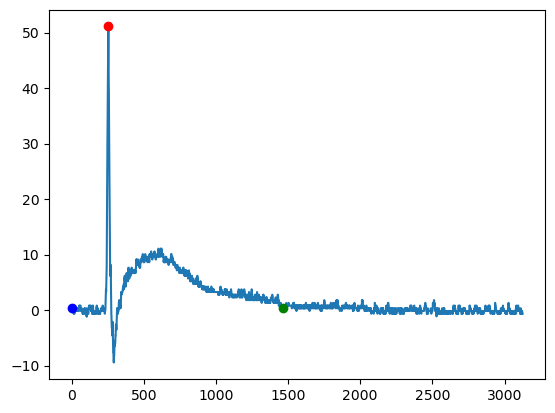

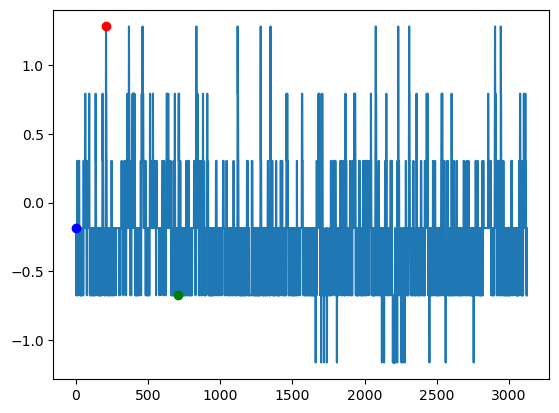

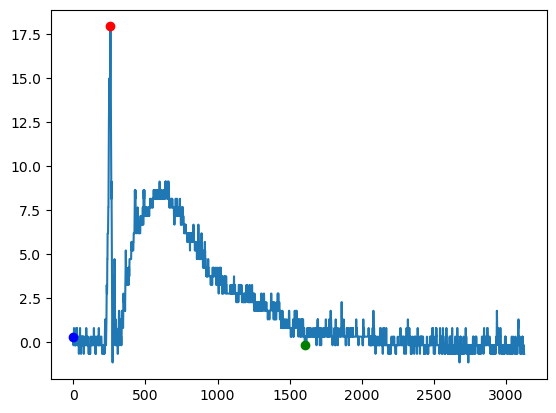

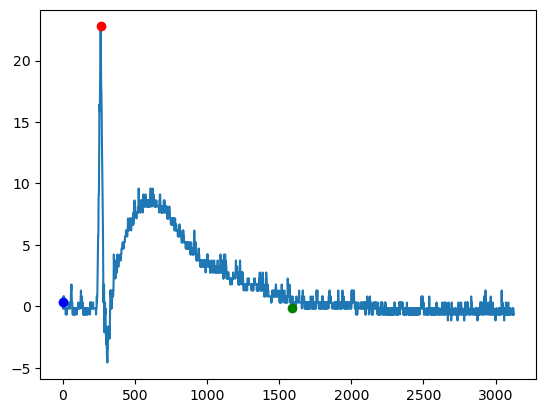

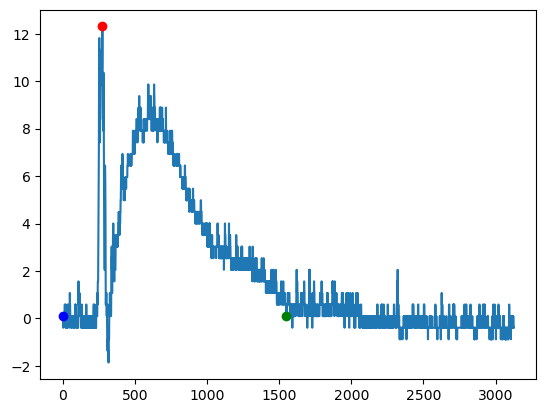

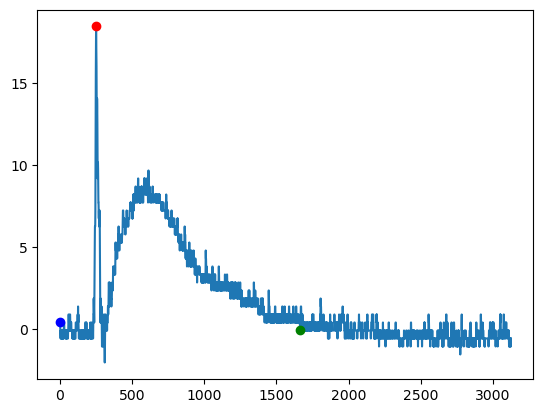

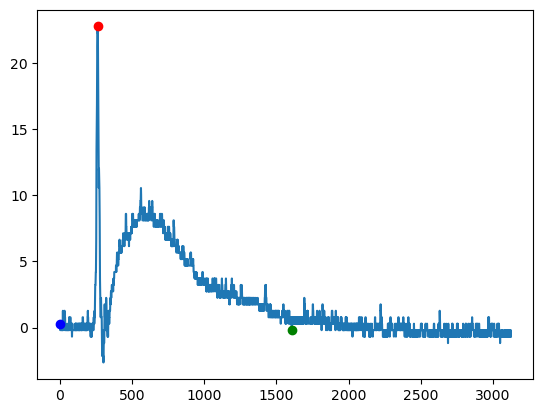

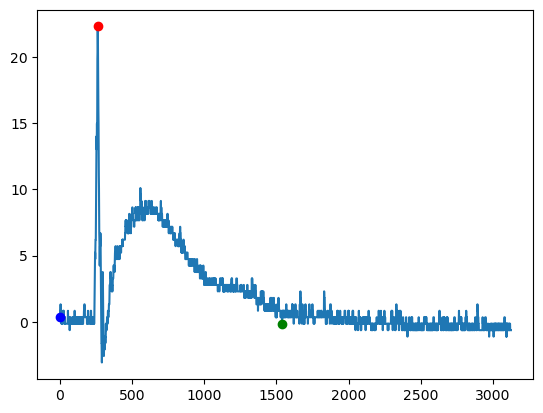

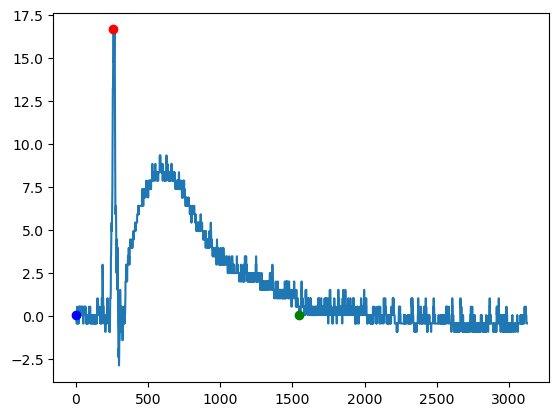

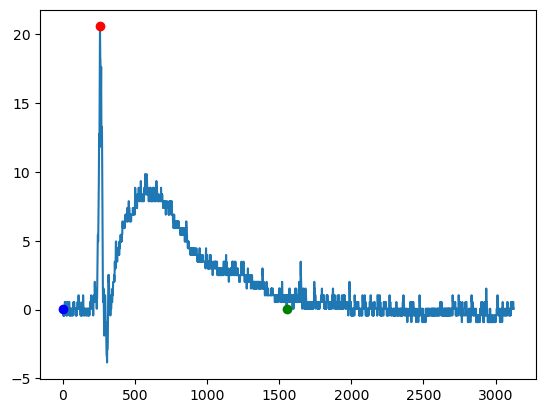

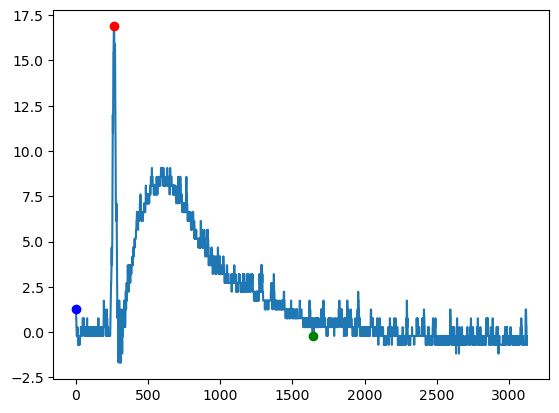

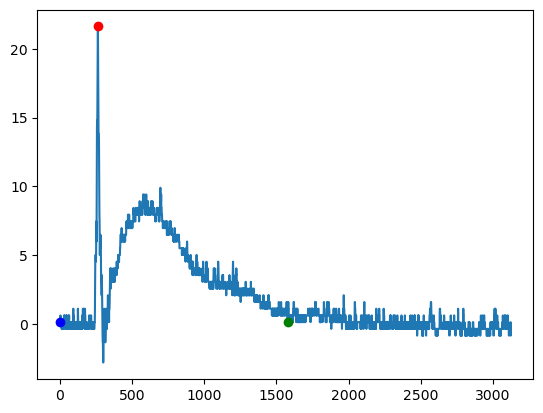

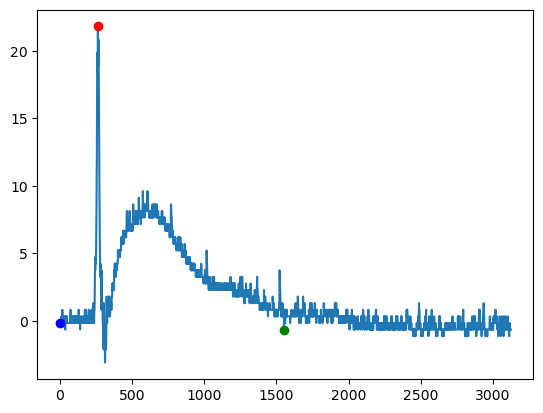

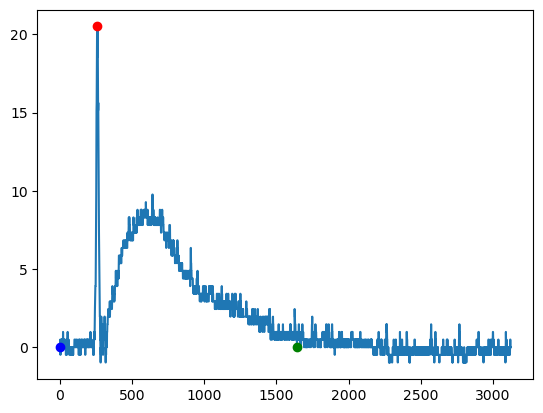

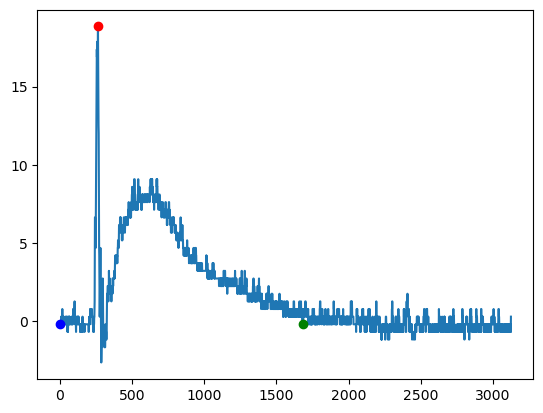

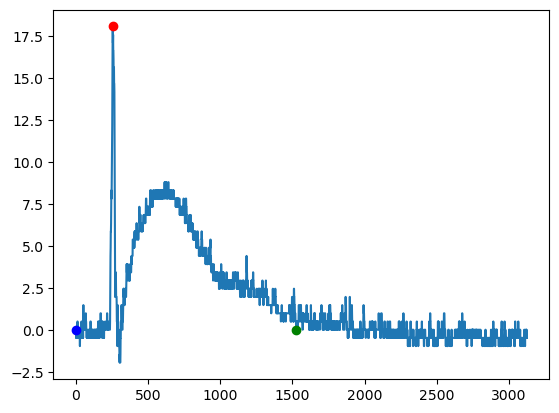

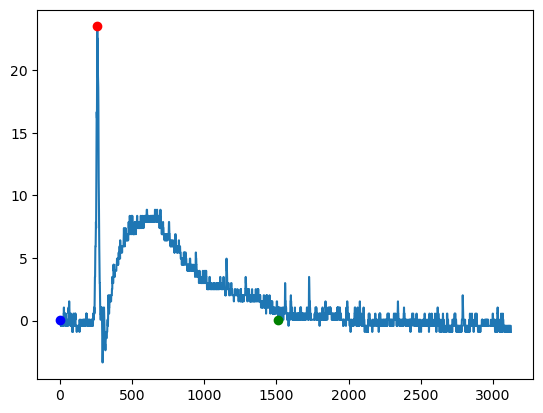

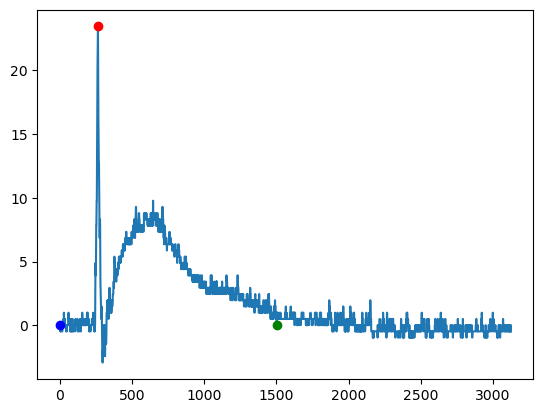

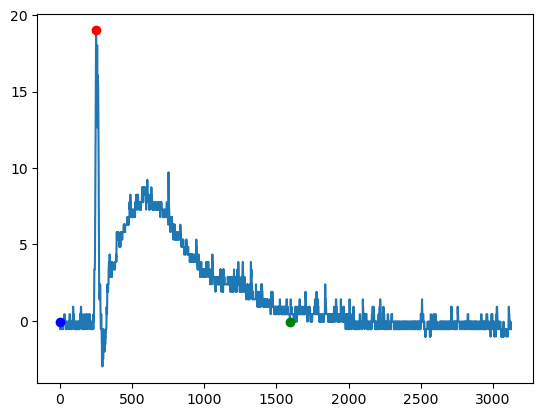

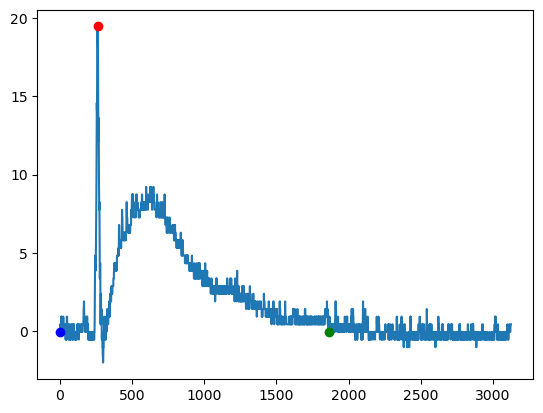

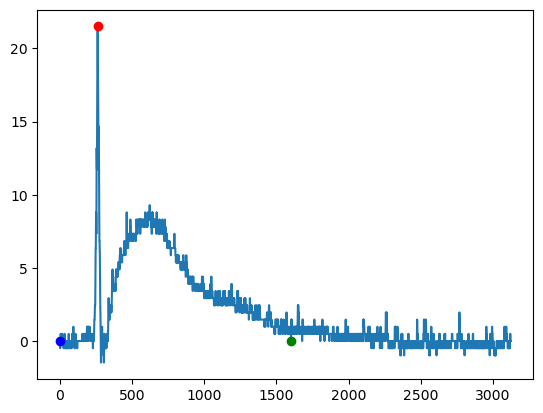

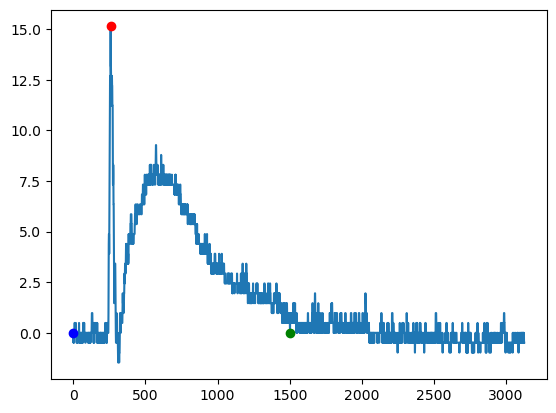

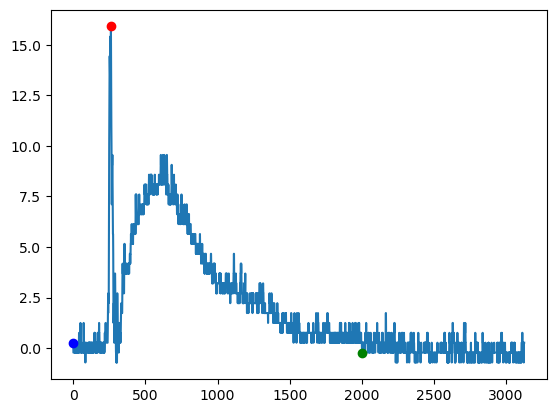

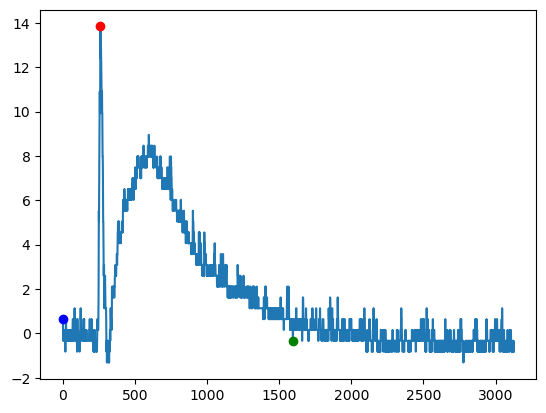

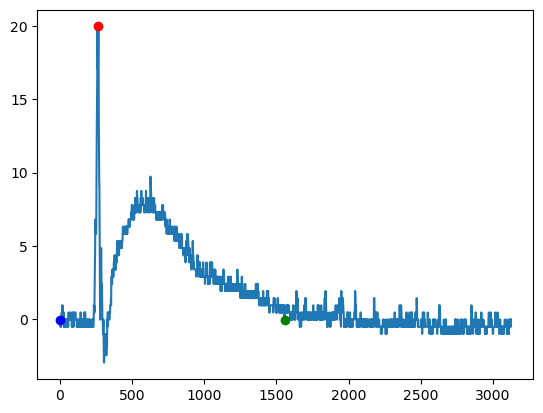

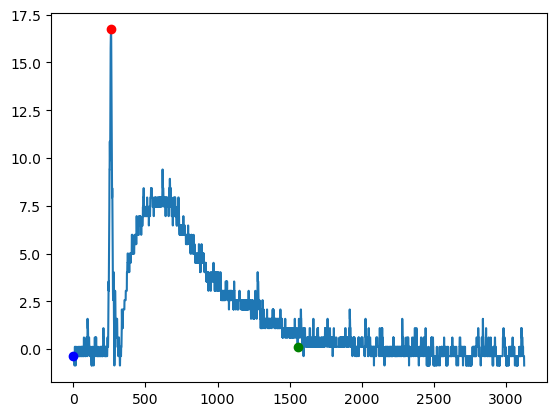

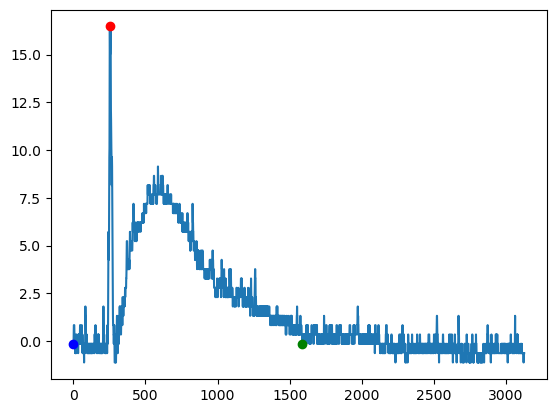

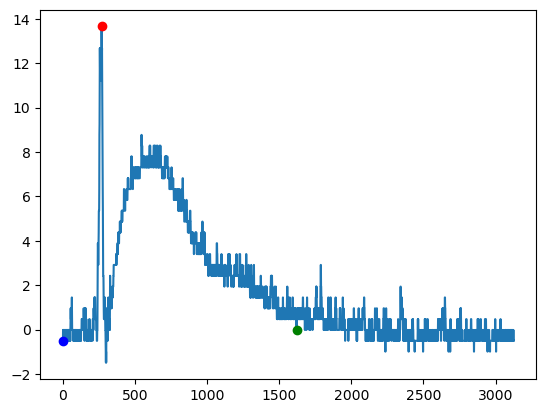

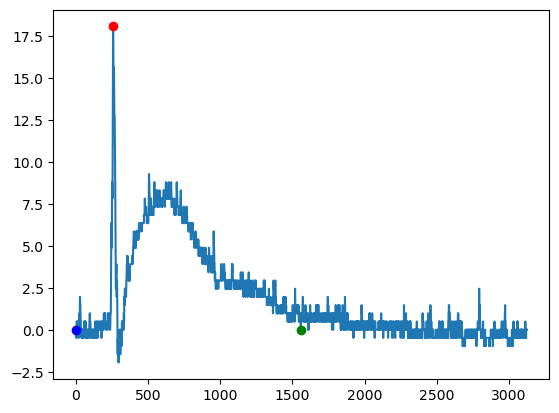

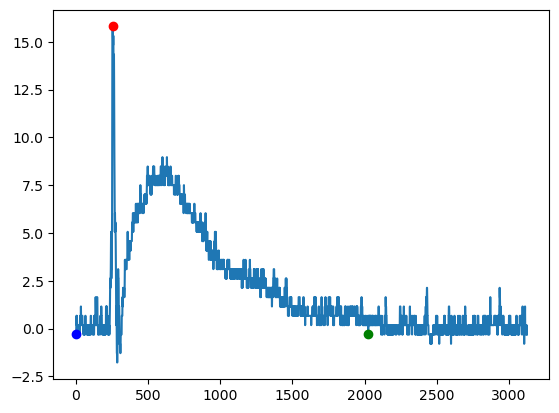

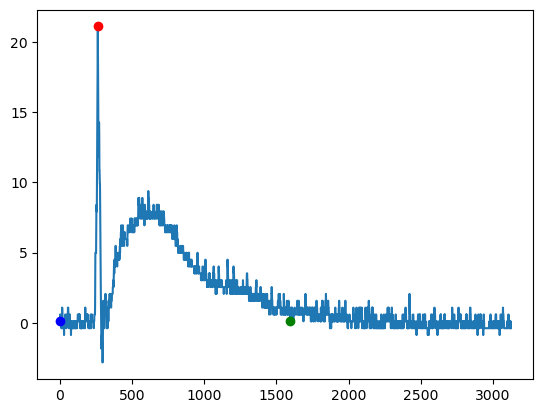

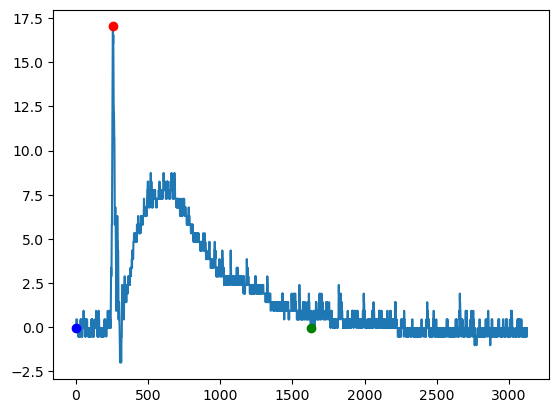

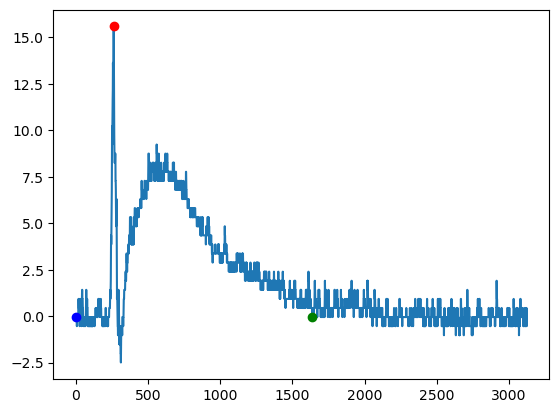

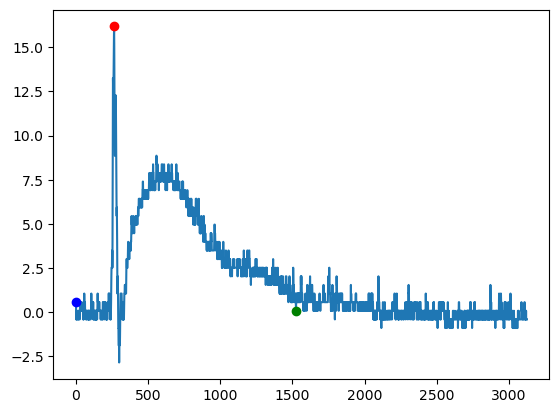

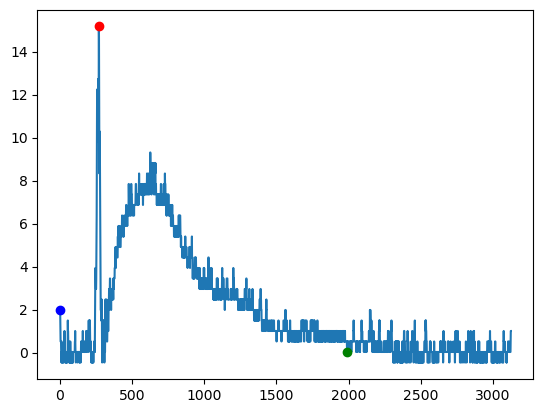

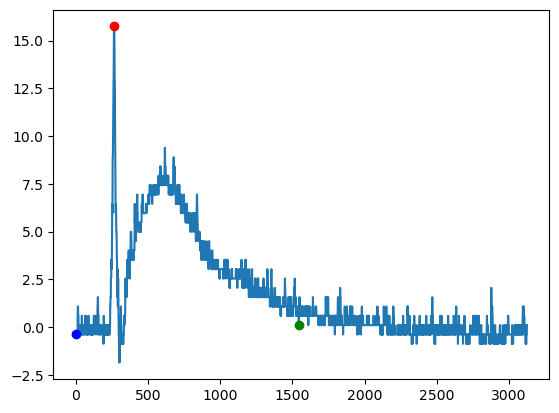

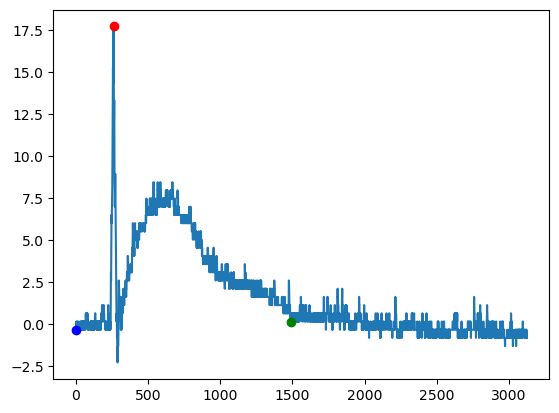

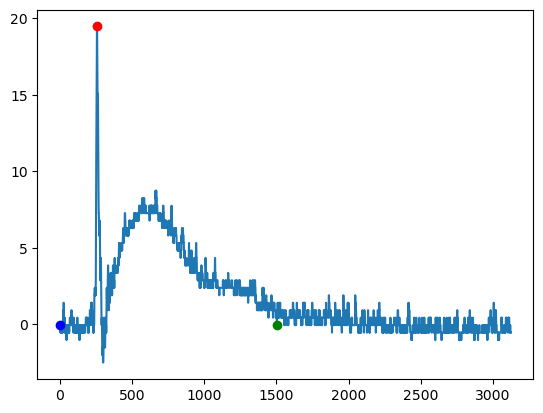

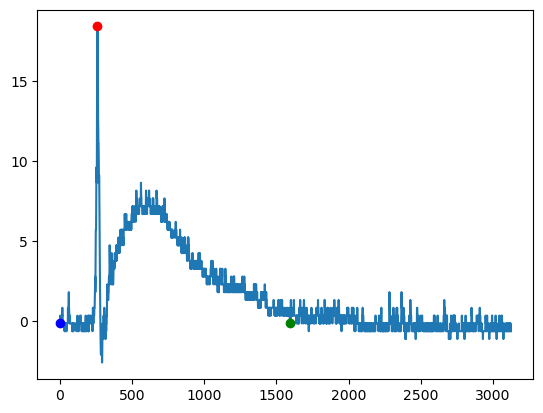

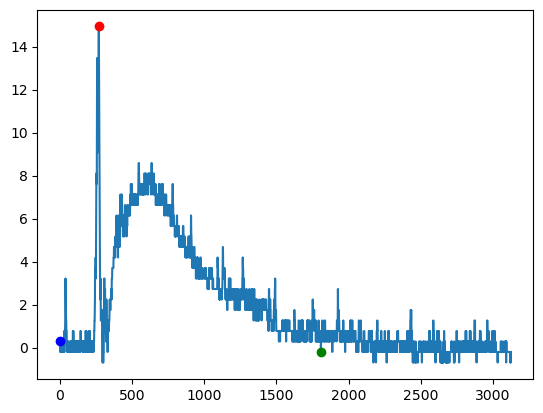

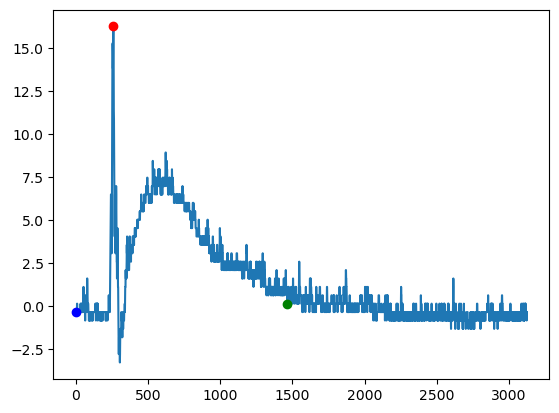

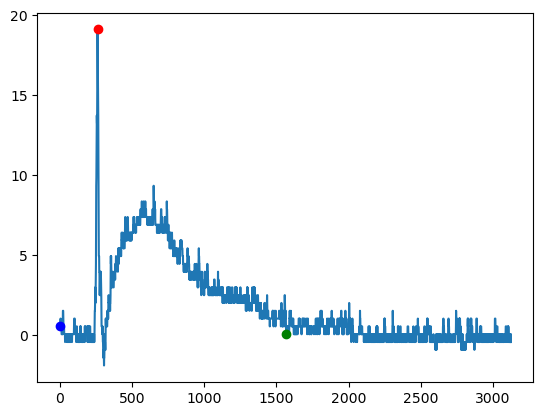

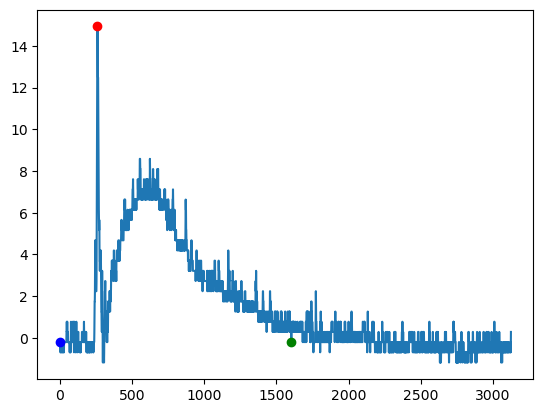

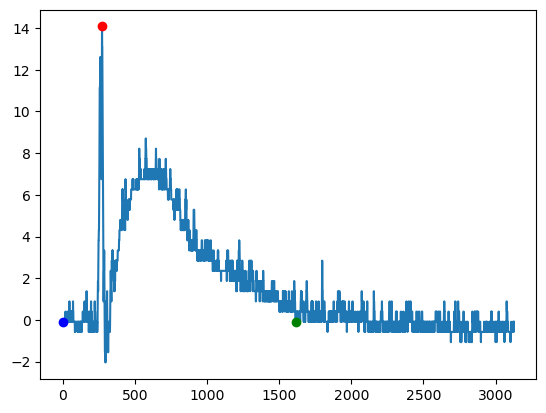

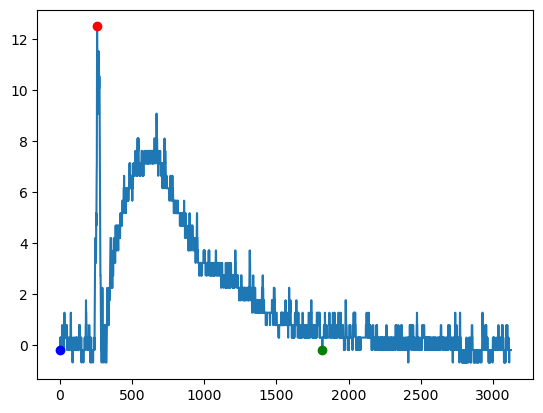

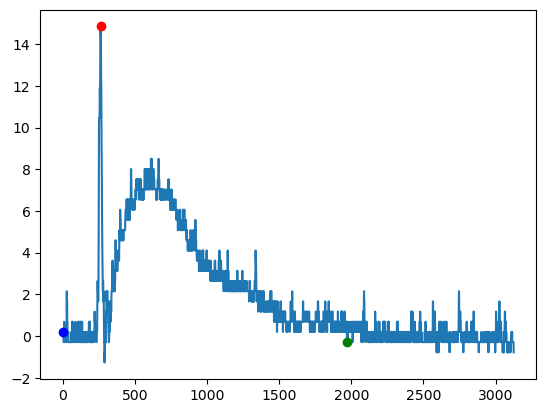

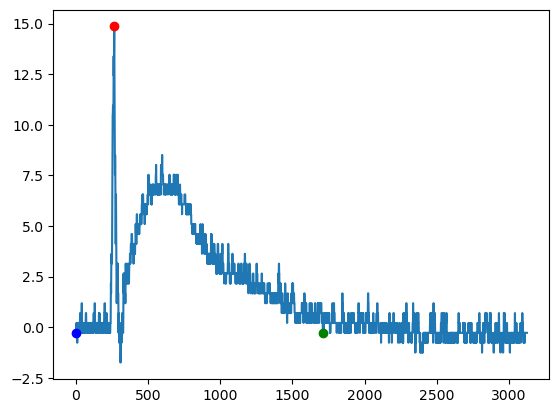

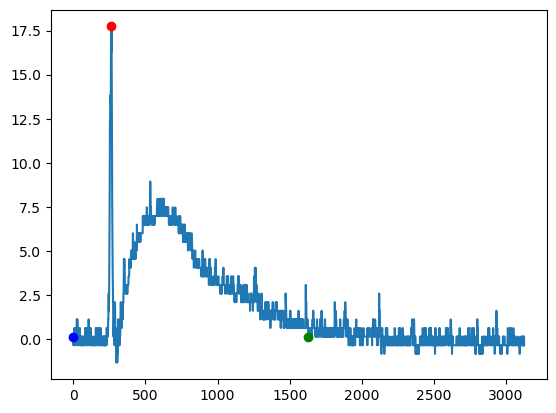

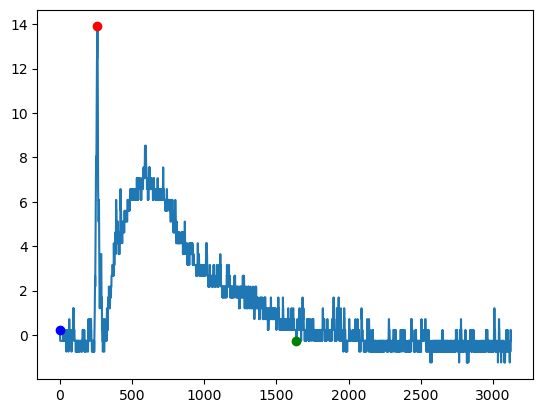

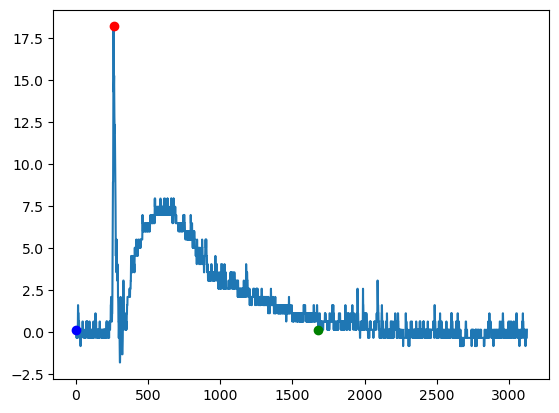

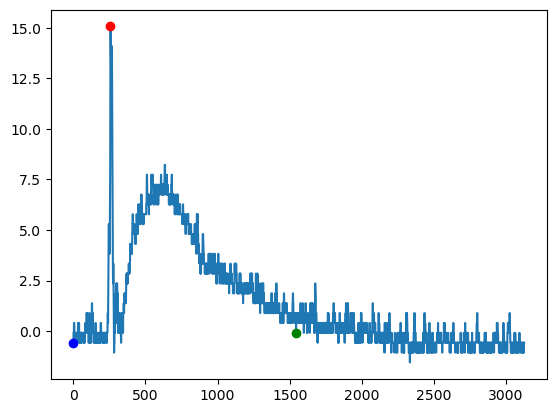

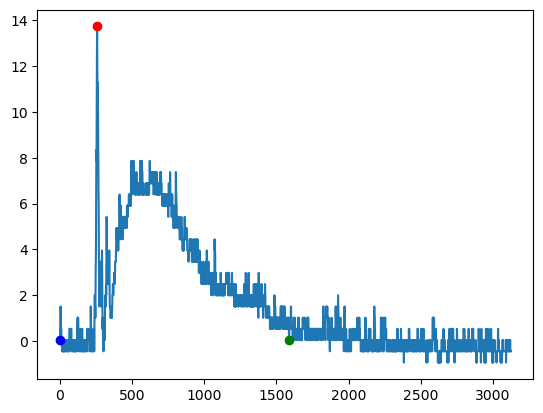

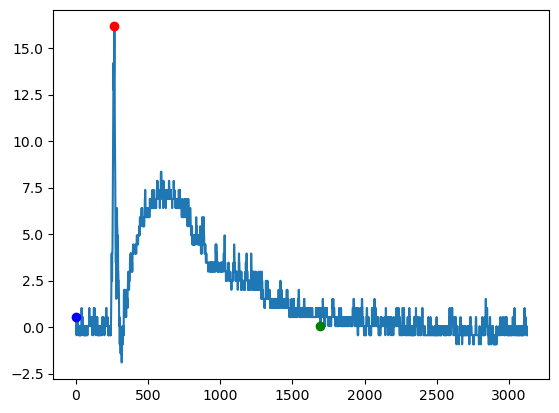

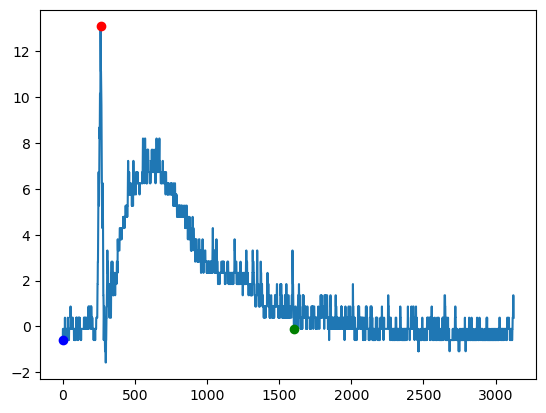

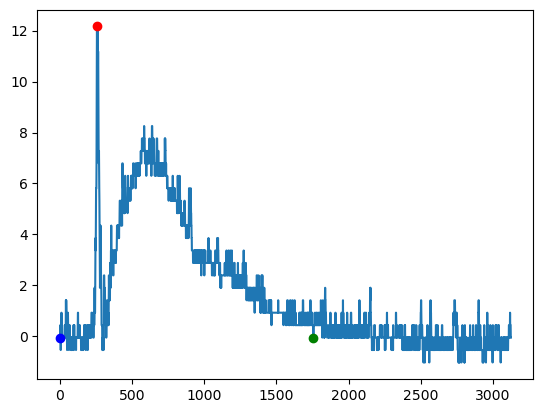

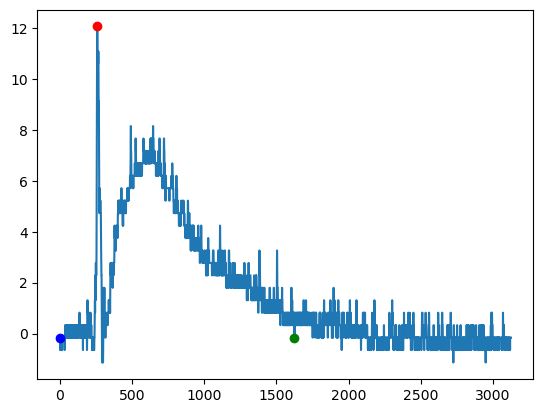

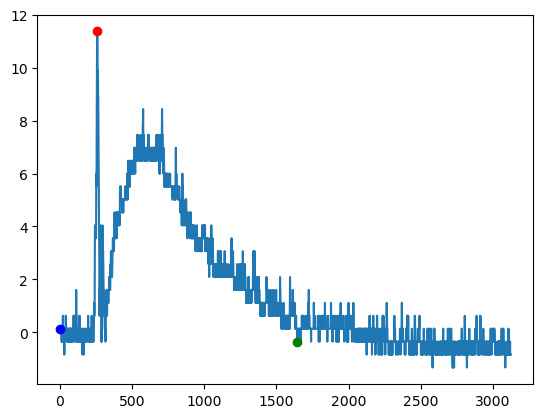

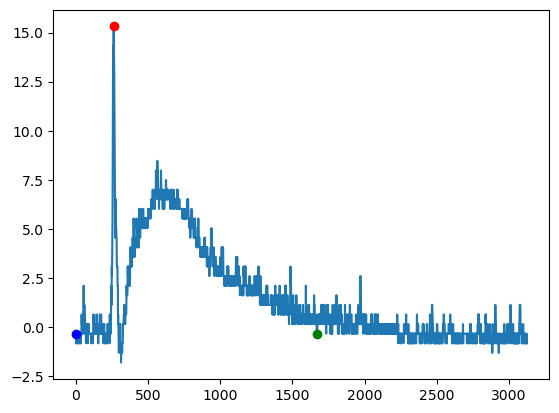

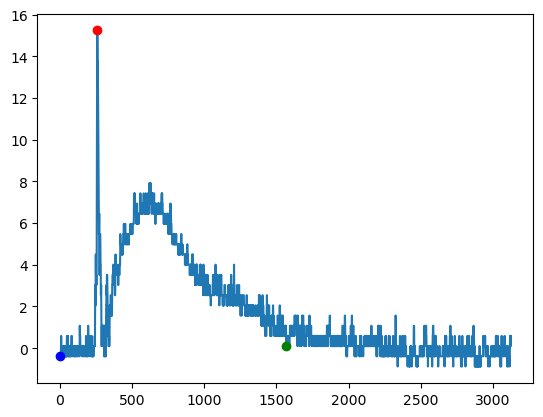

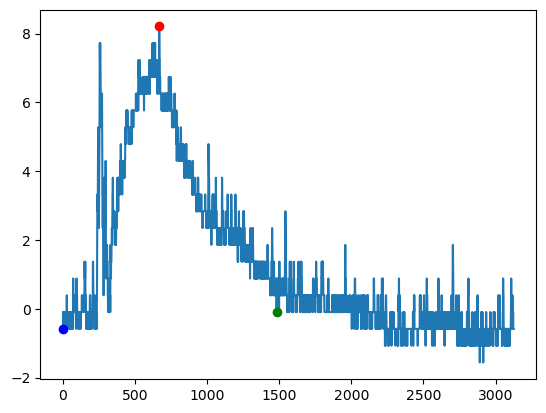

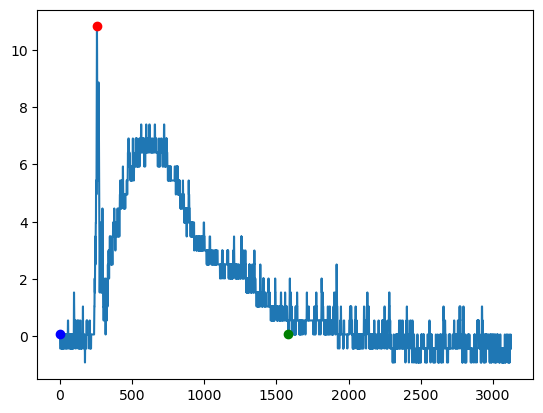

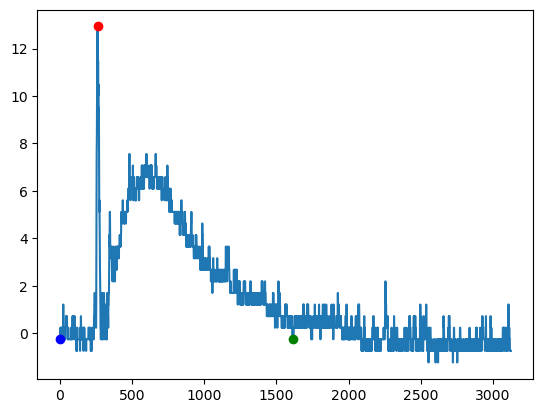

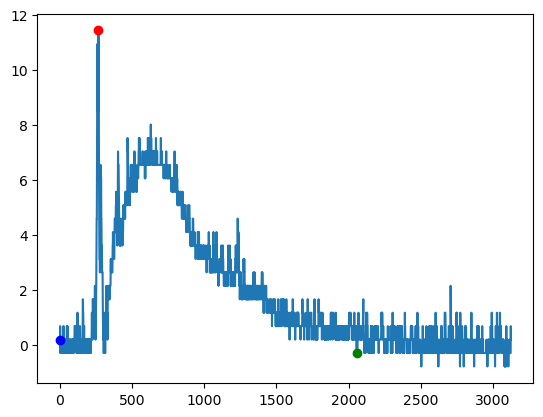

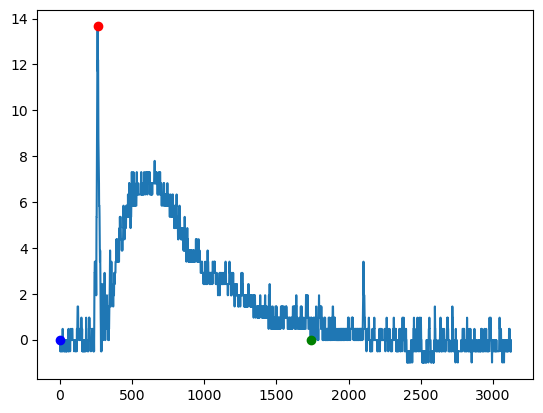

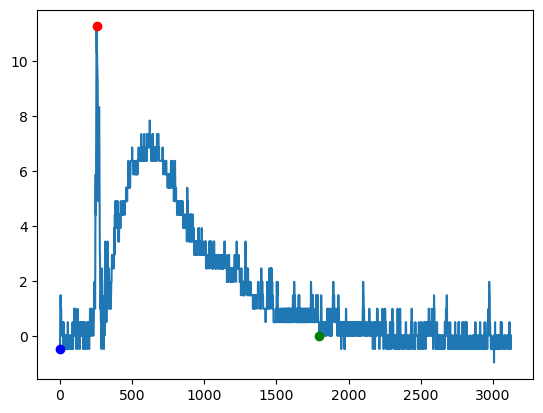

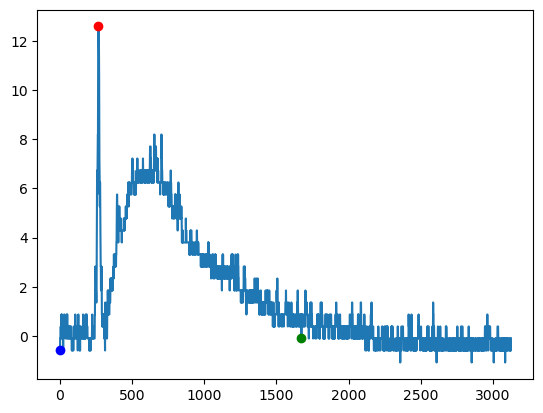

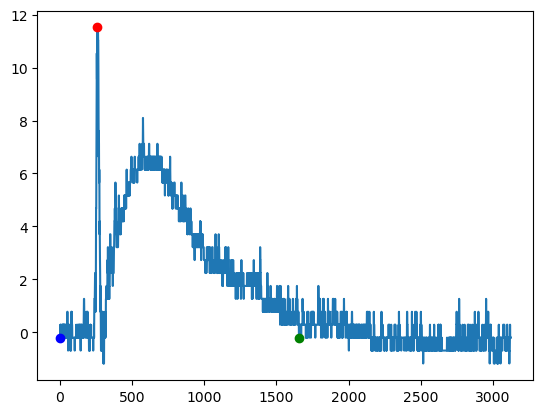

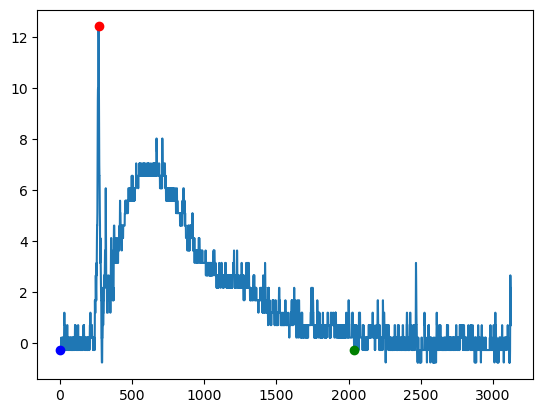

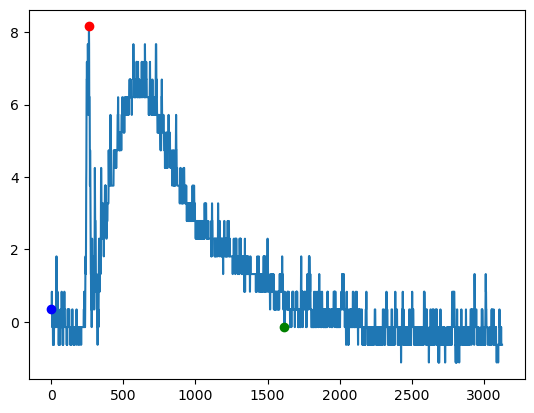

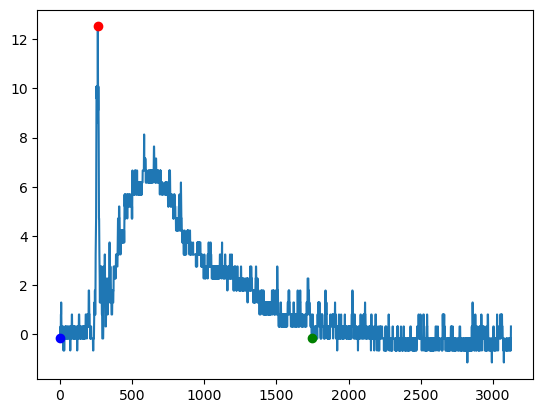

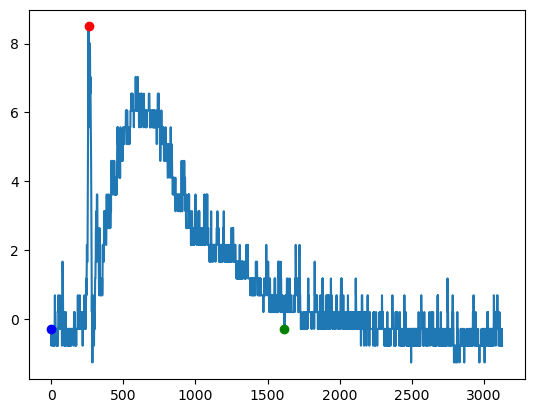

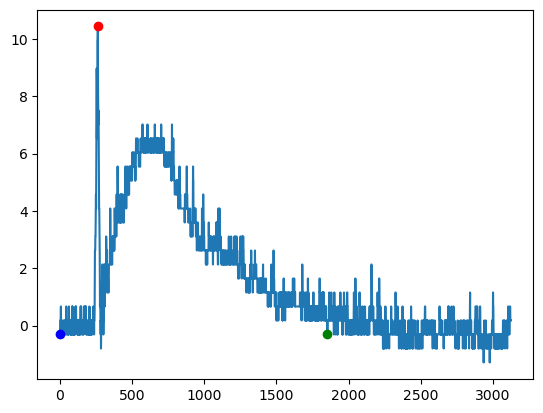

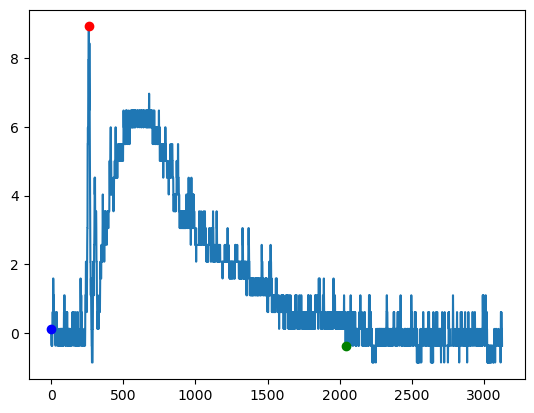

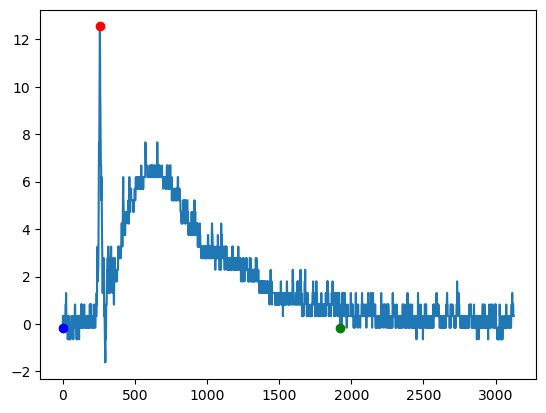

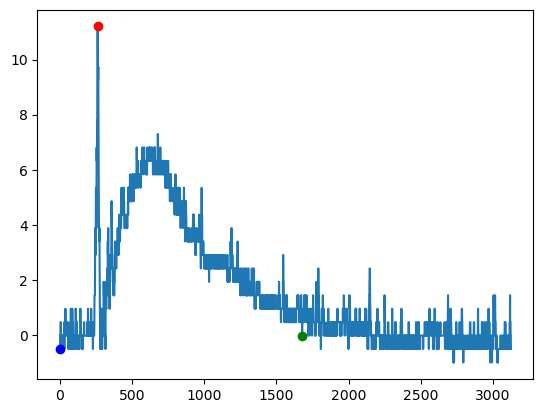

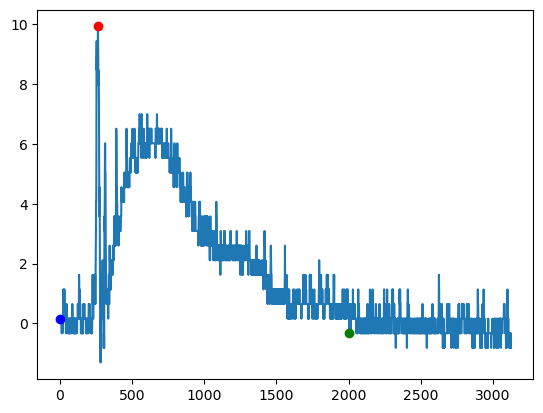

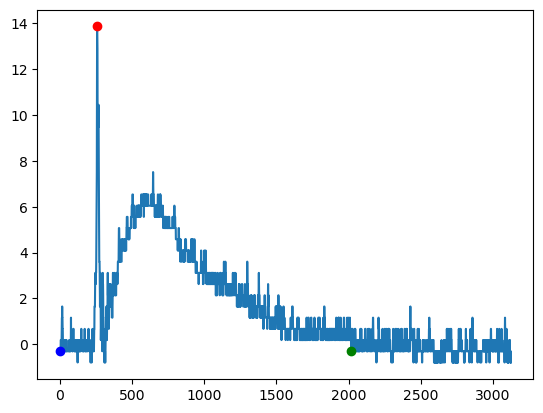

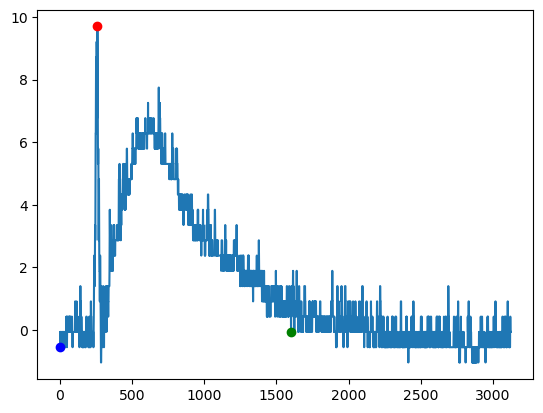

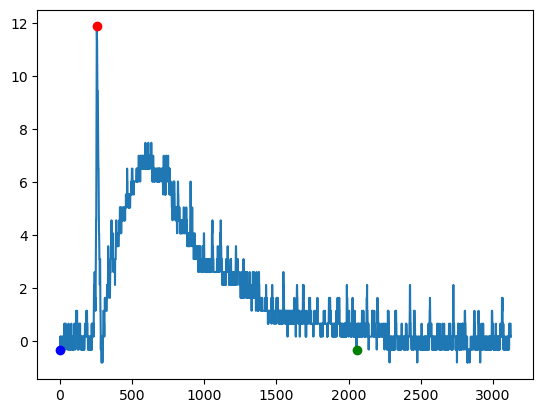

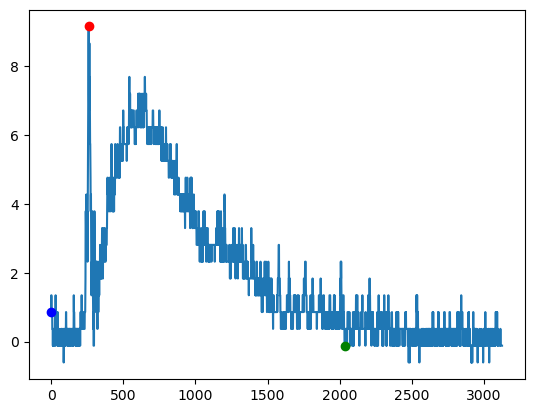

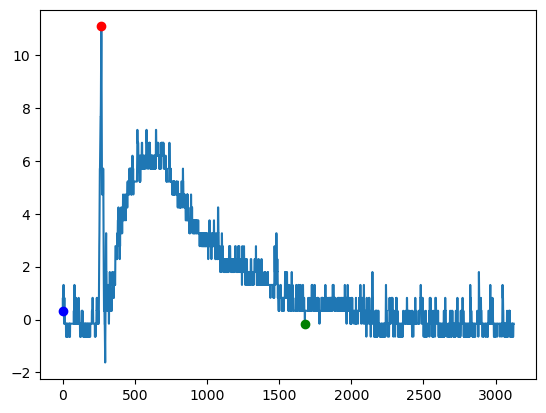

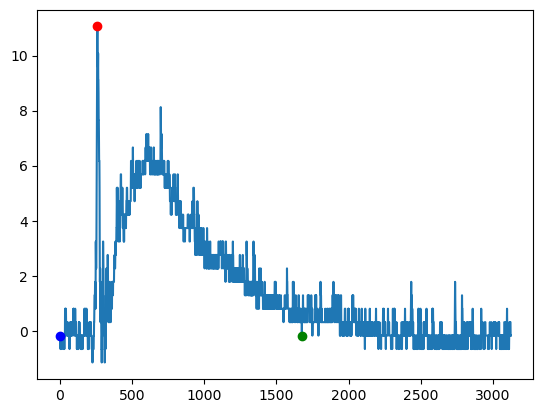

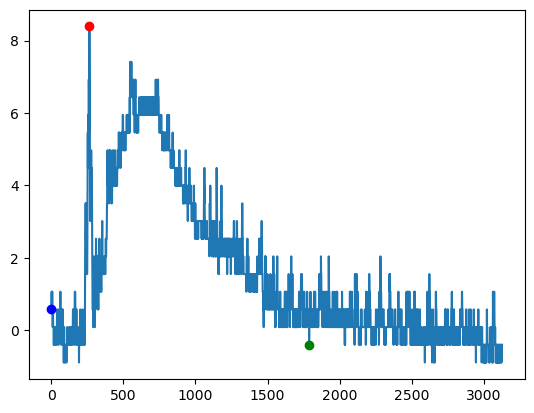

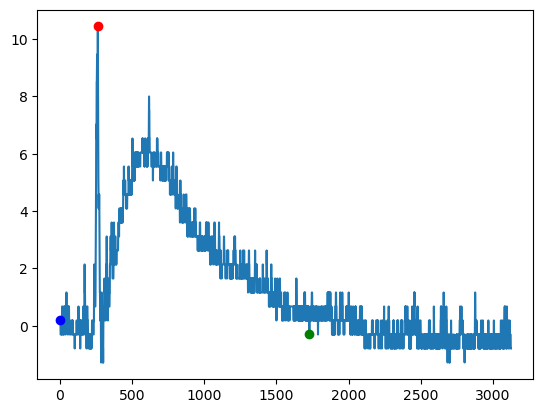

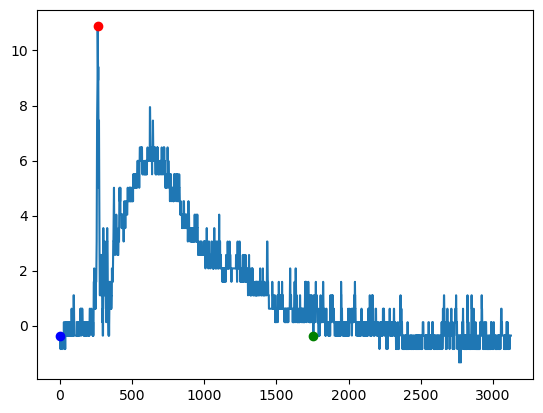

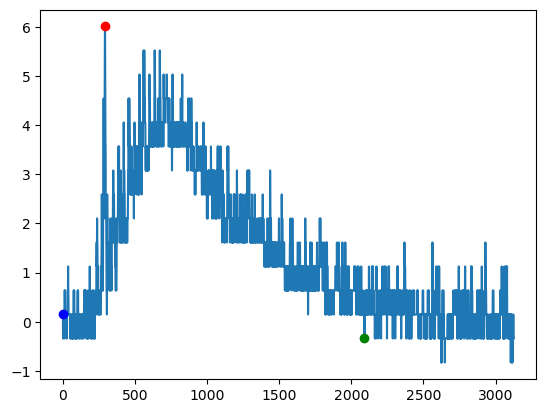

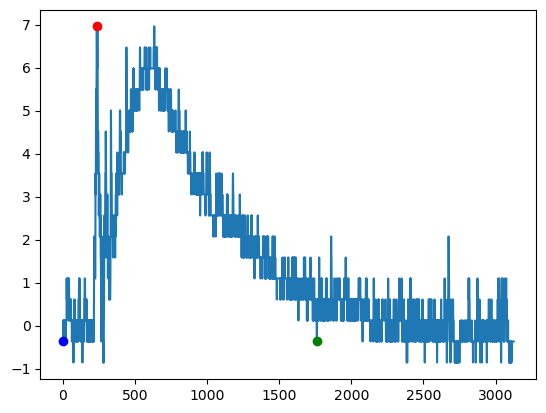

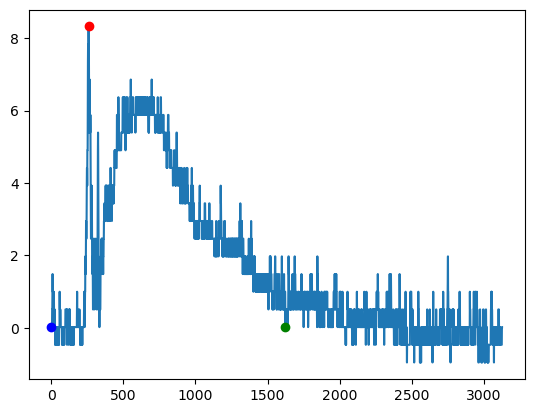

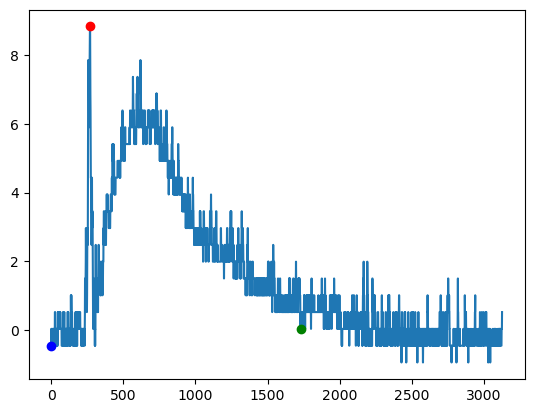

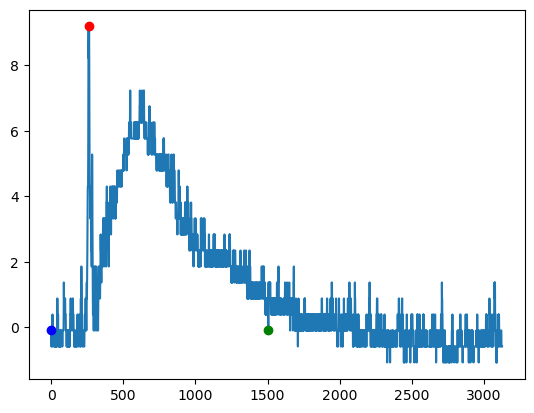

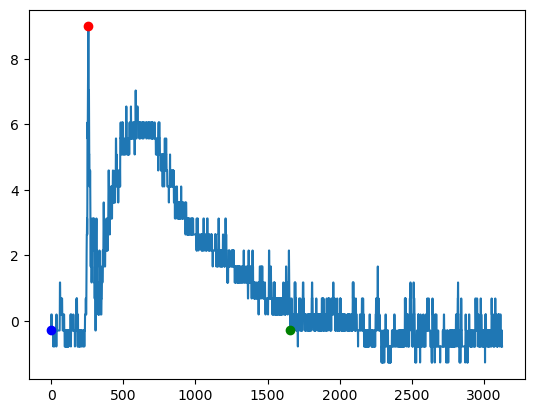

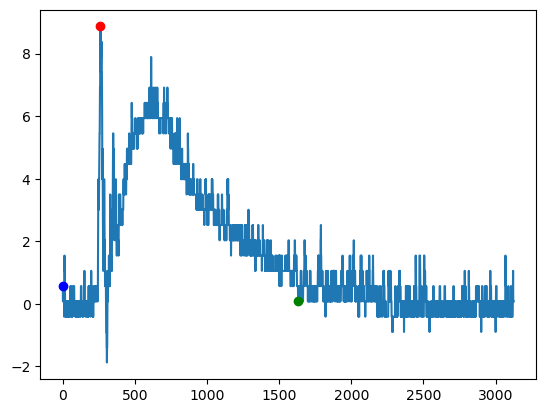

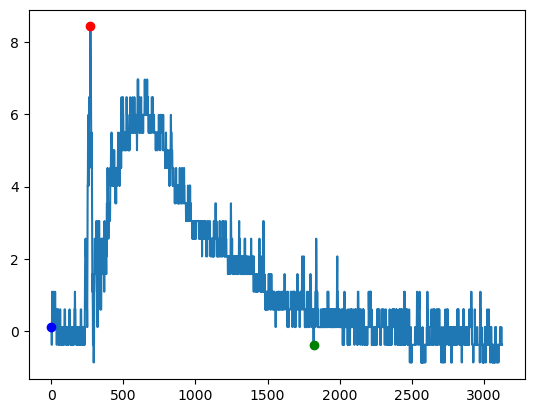

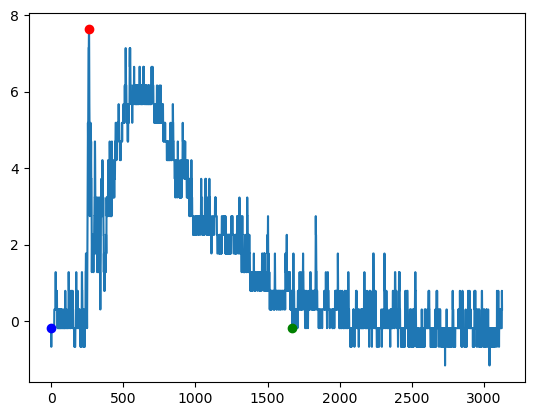

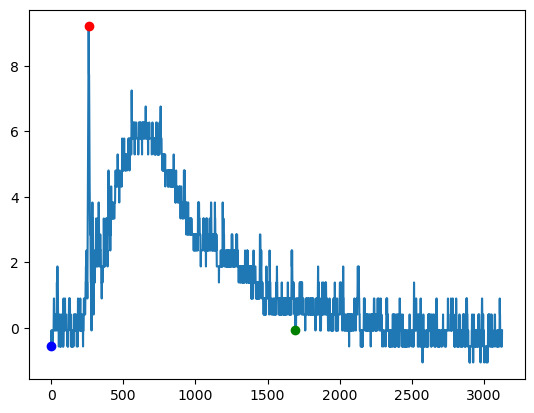

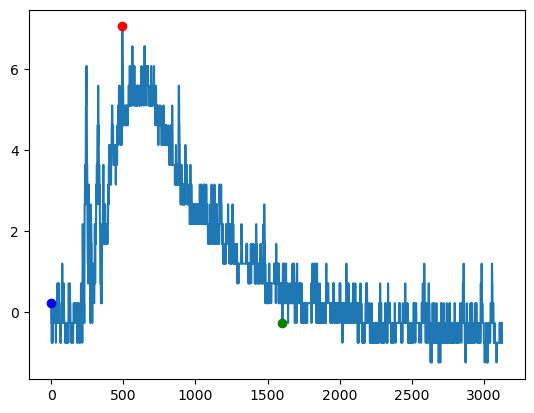

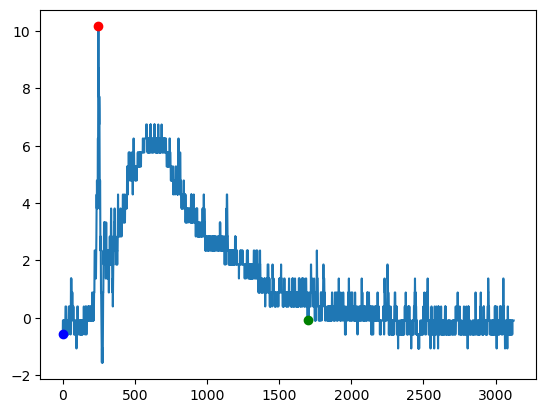

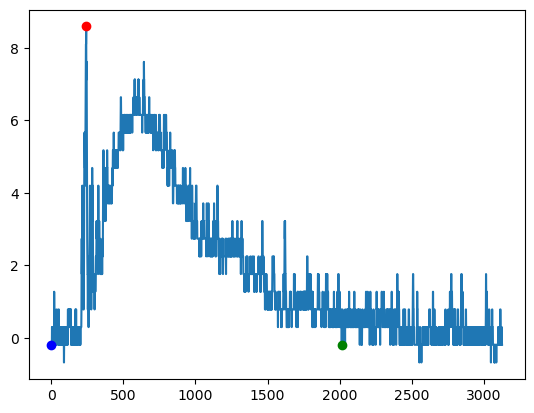

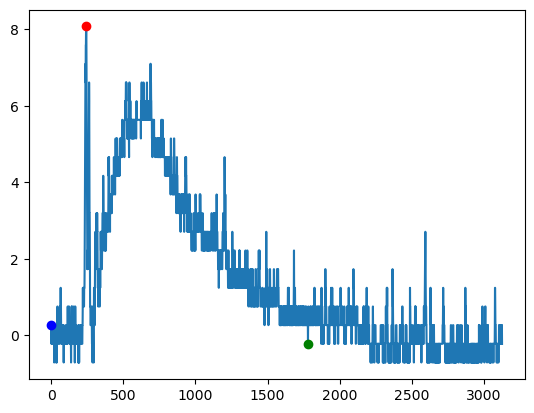

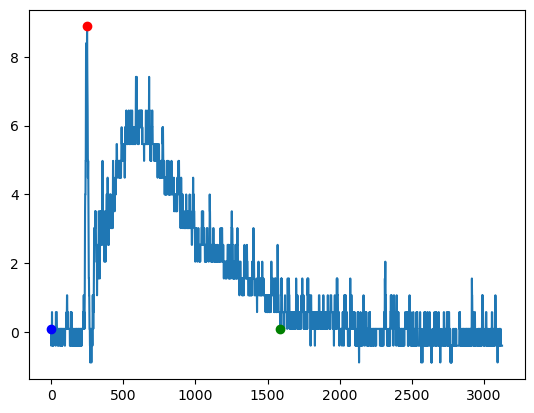

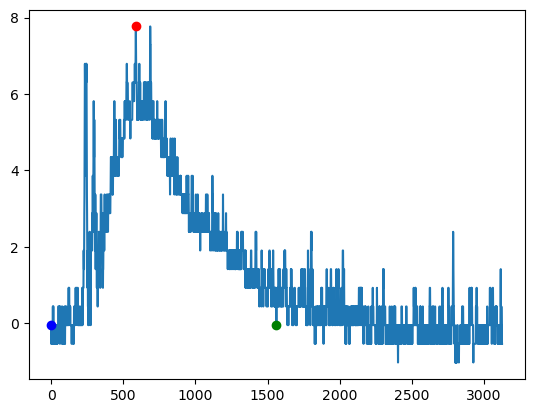

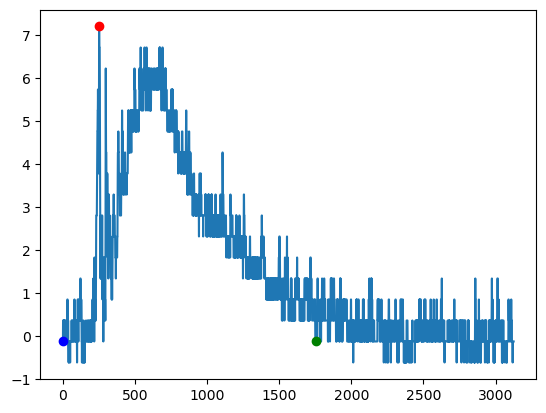

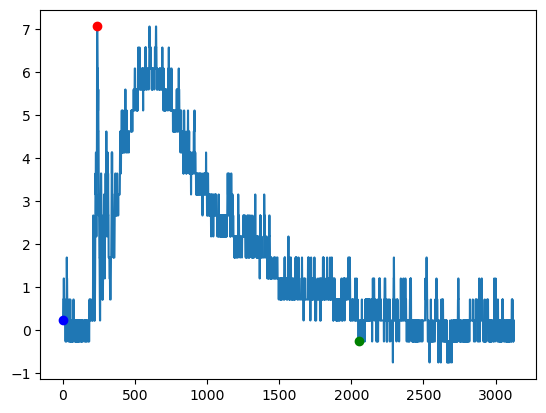

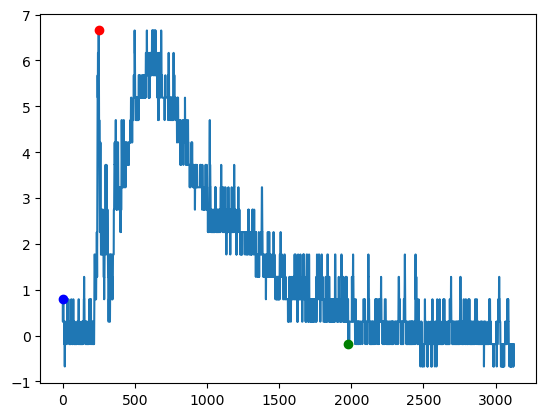

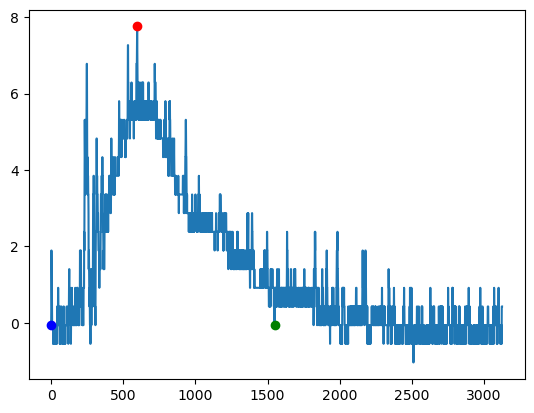

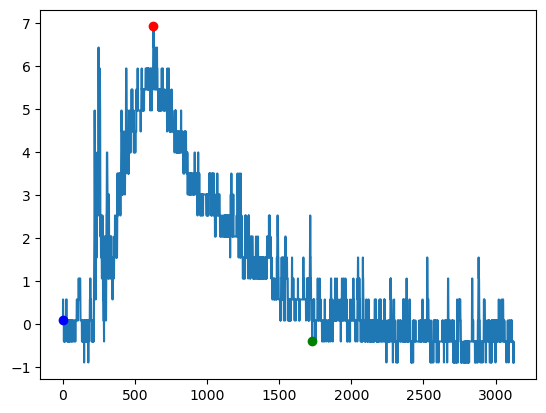

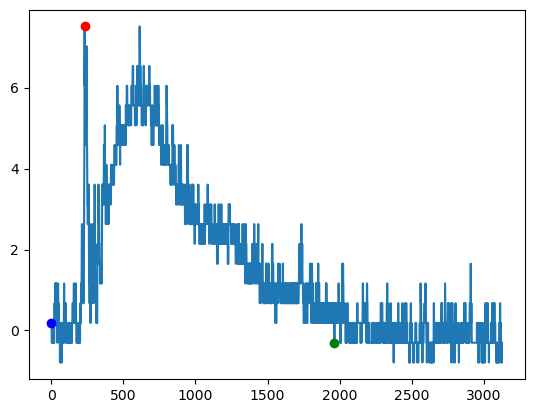

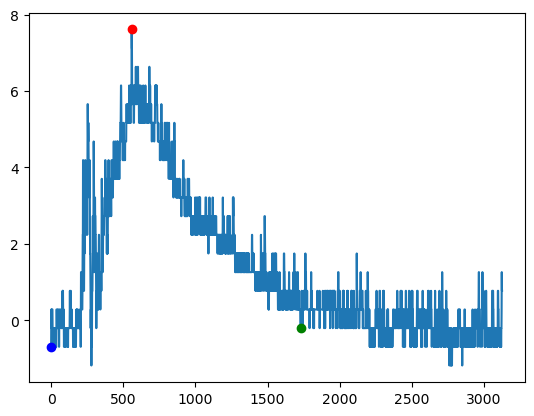

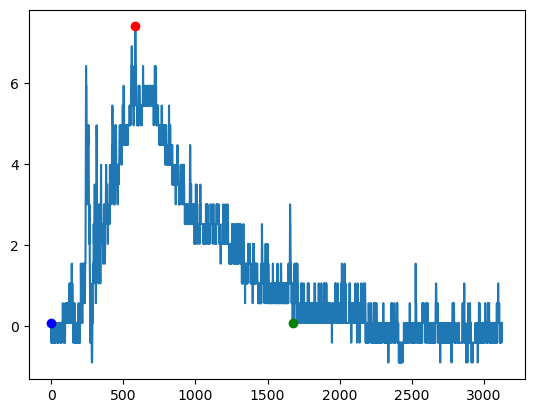

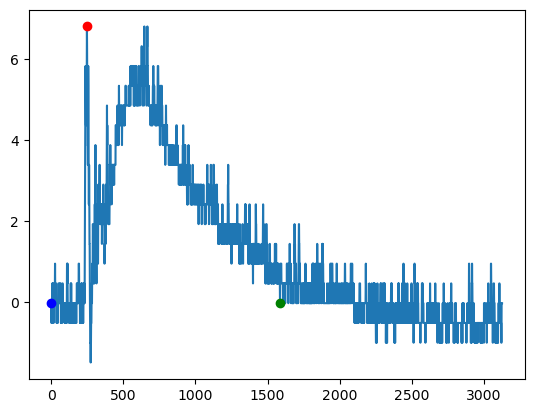

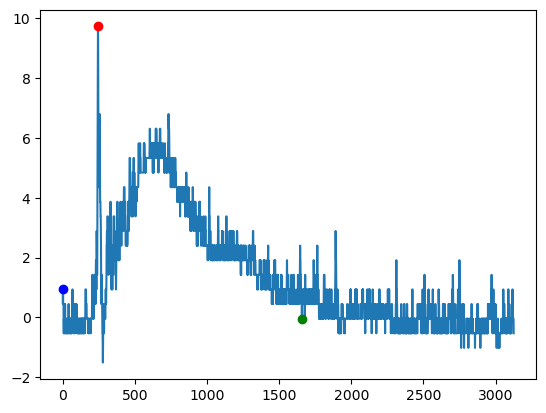

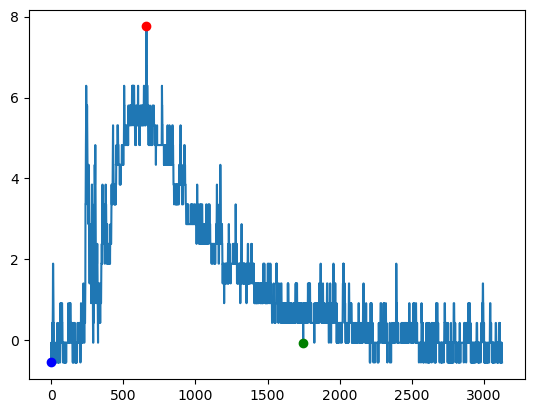

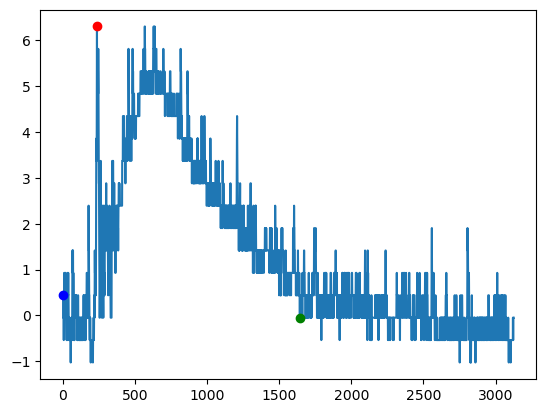

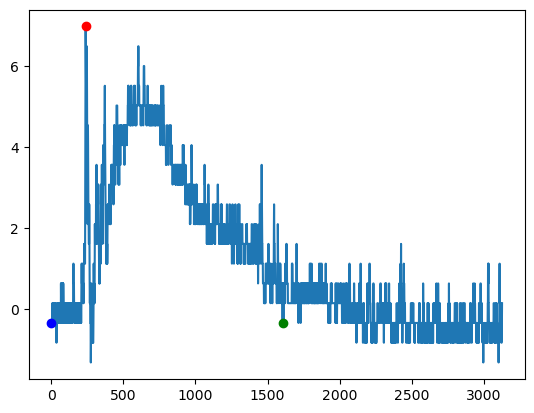

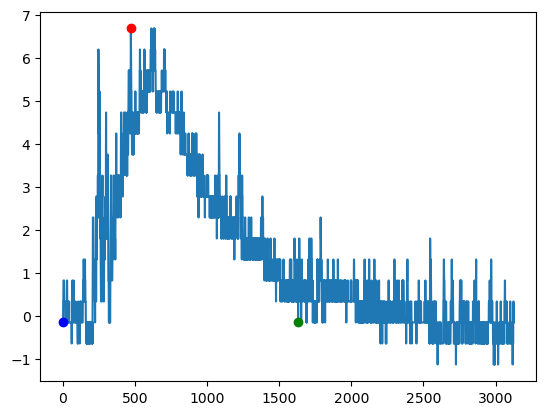

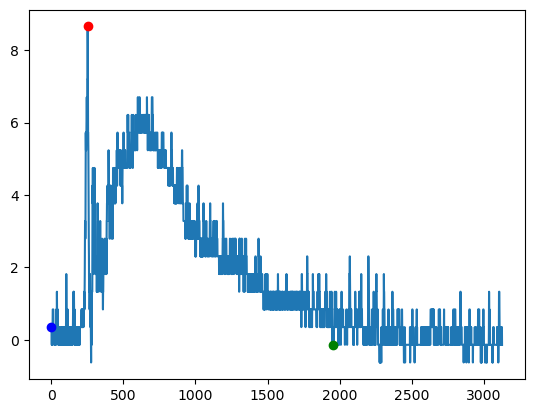

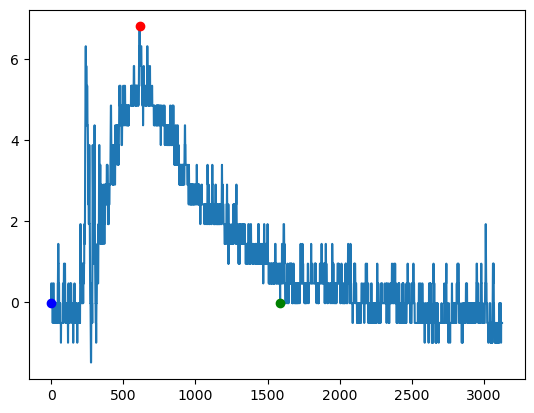

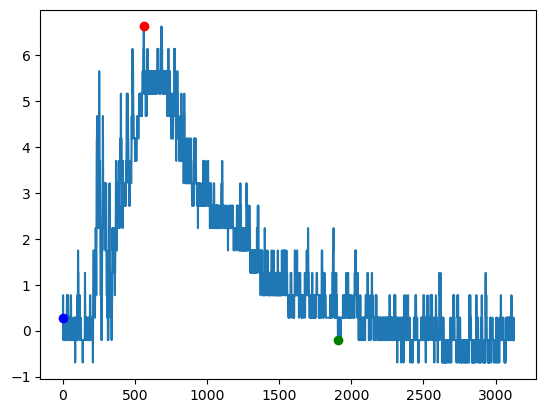

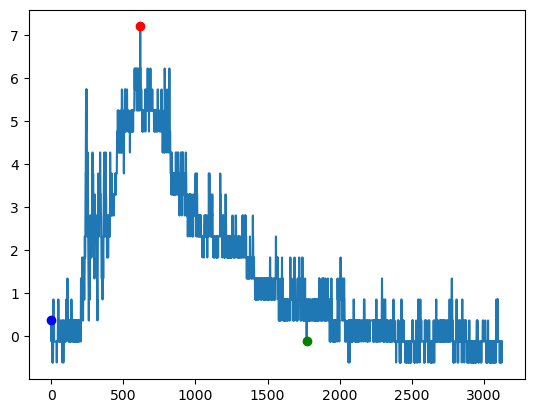

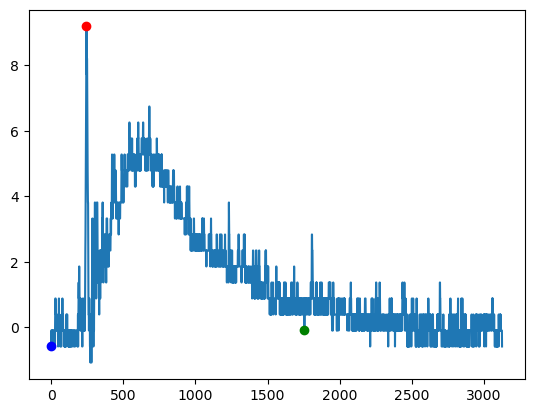

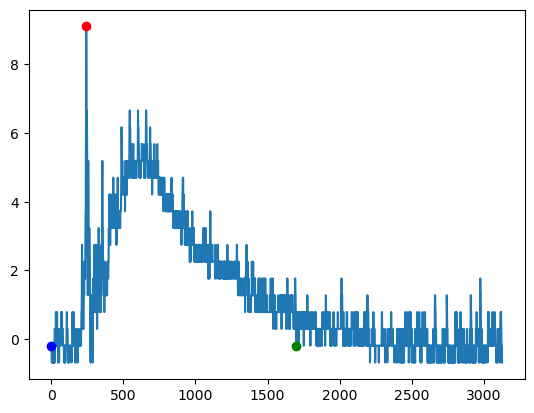

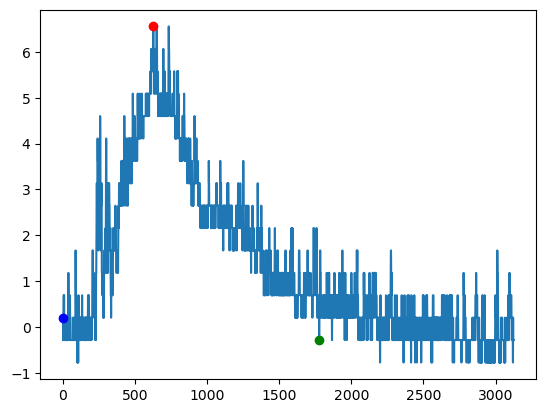

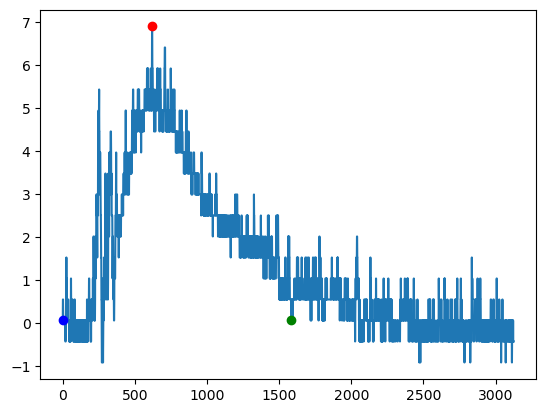

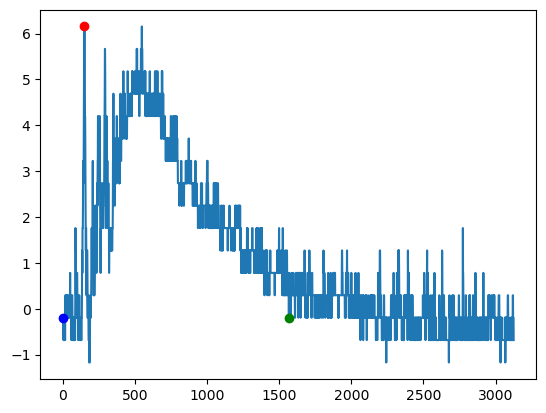

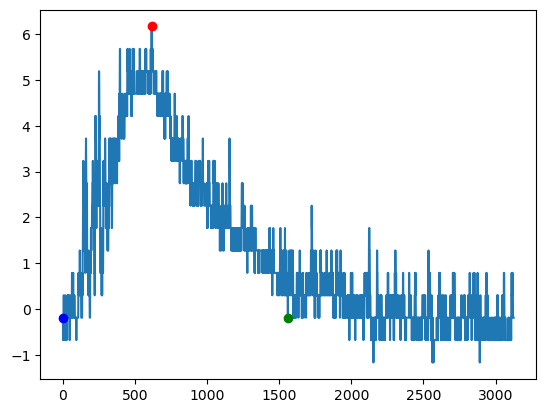

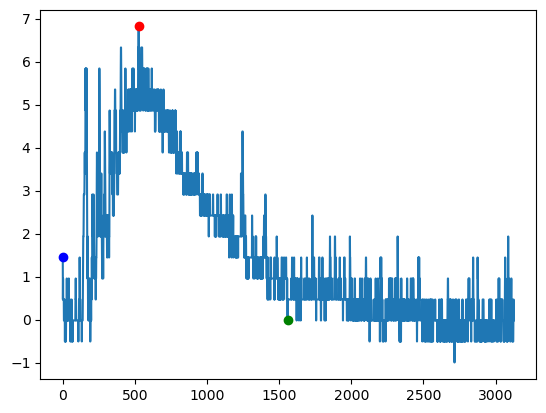

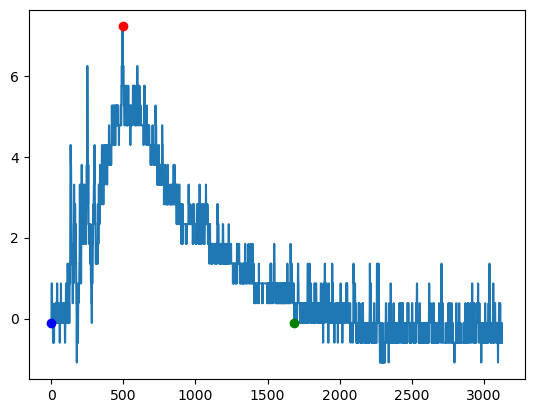

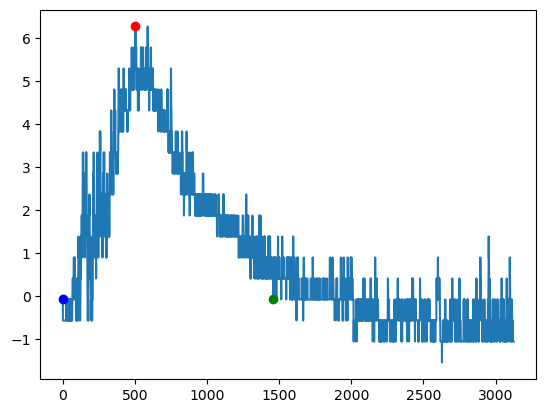

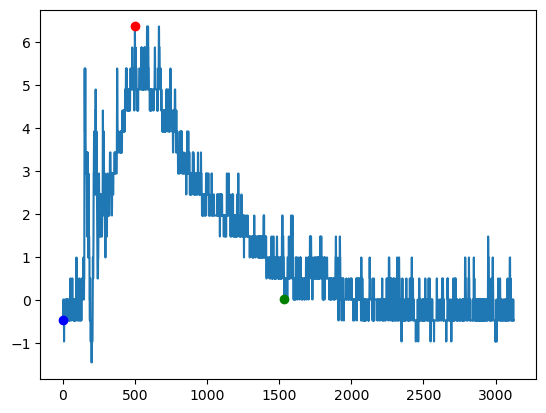

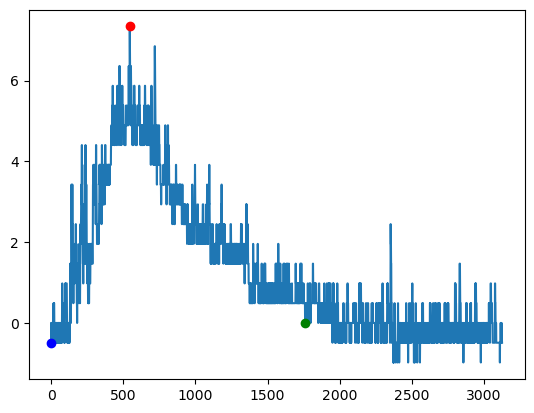

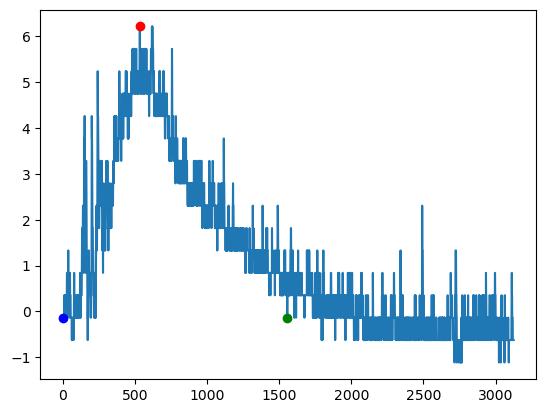

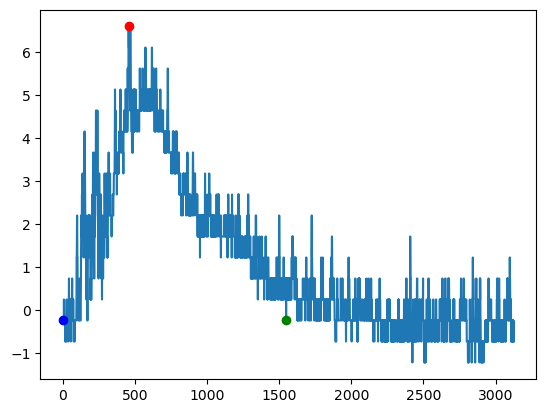

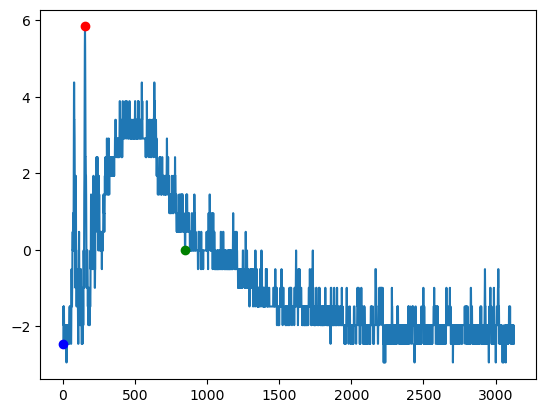

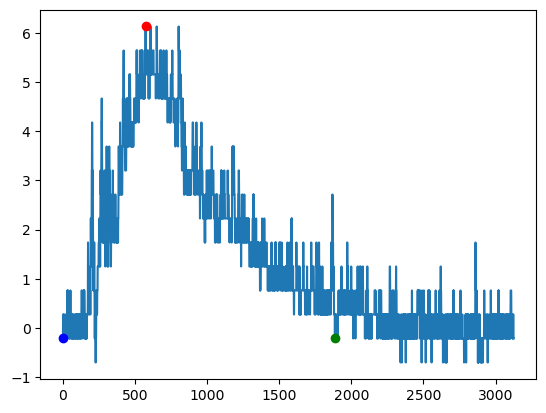

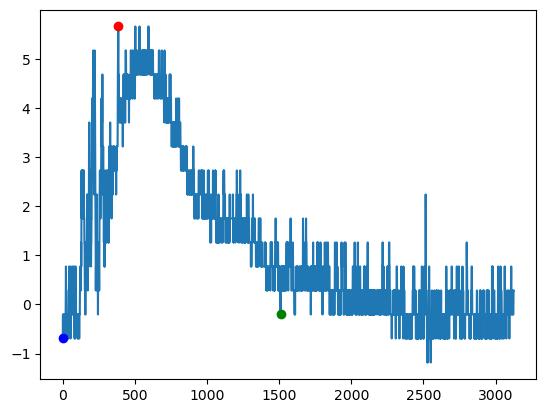

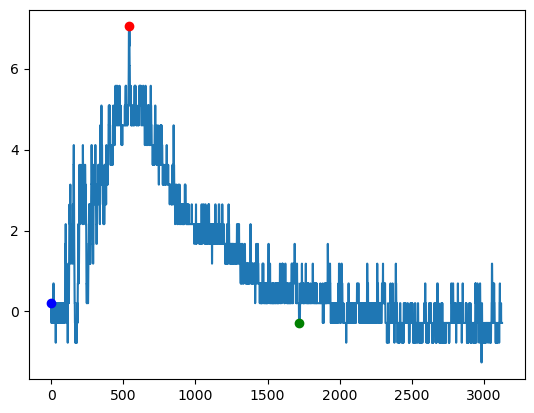

KeyboardInterrupt: 

In [152]:
for i in range(len(nRUN2_bs.rwf)+6840):
        plt.plot(nRUN2_bs.rwf[i])
        plt.plot(np.argmax(nRUN2_bs.rwf[i]), nRUN2_bs.rwf[i][np.argmax(nRUN2_bs.rwf[i])], "ro")
        plt.plot(roi2[i][0], nRUN2_bs.rwf[i][int(roi2[i][0])], "bo")
        plt.plot(roi2[i][1], nRUN2_bs.rwf[i][int(roi2[i][1])], "go")
        plt.show()
        #print(0.1*nRUN1_bs.rwf[i][np.argmax(nRUN1_bs.rwf[i])])
        #print(nRUN1_bs.rwf[i][int(roi1[i][1])])

In [ ]:
nRUN1_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN1_pressure.csv", delimiter=",", skip_header=1)
nRUN2_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN2_pressure.csv", delimiter=",", skip_header=1)
nRUN3_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN3_pressure.csv", delimiter=",", skip_header=1)
nRUN4_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN4_pressure.csv", delimiter=",", skip_header=1)
nRUN5_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN5_pressure.csv", delimiter=",", skip_header=1)
nRUN_pressure = [nRUN1_pressure, nRUN2_pressure, nRUN3_pressure, nRUN4_pressure, nRUN5_pressure]

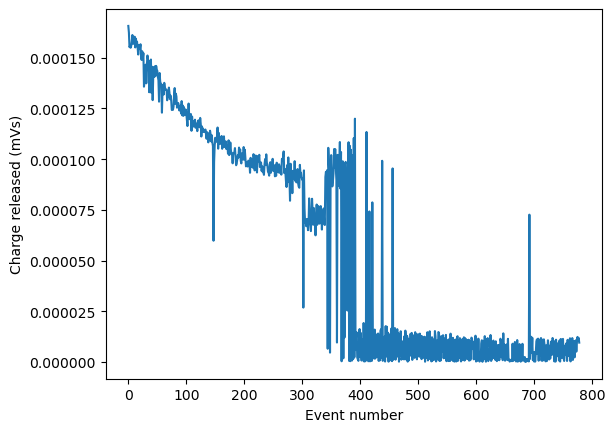

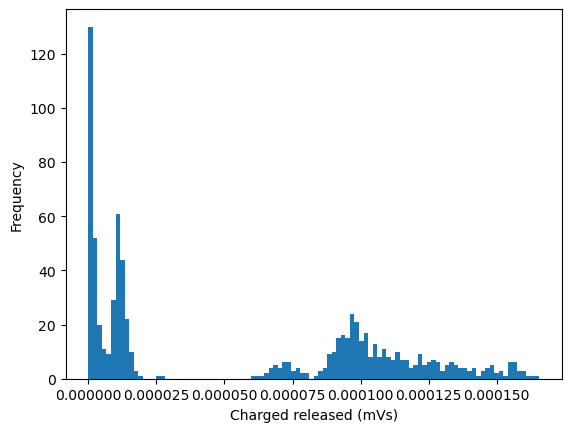

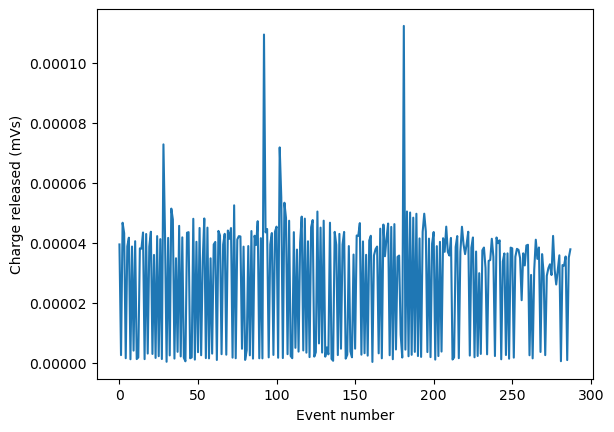

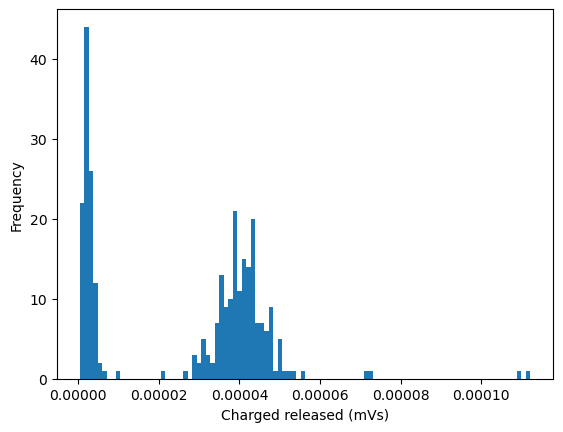

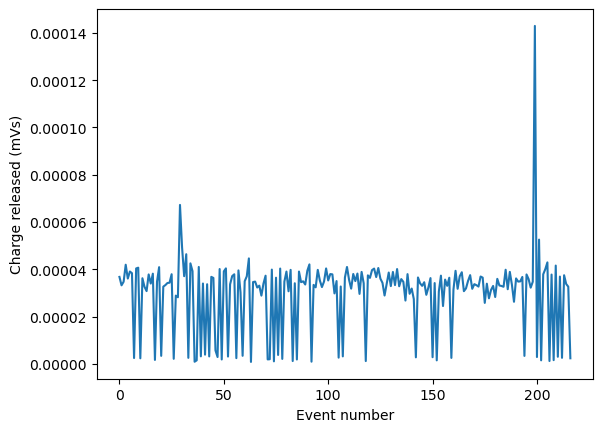

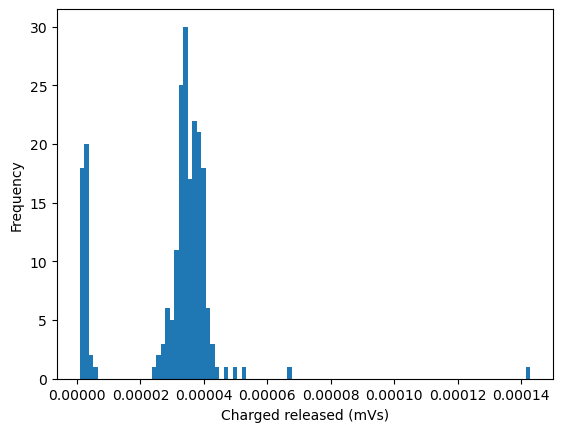

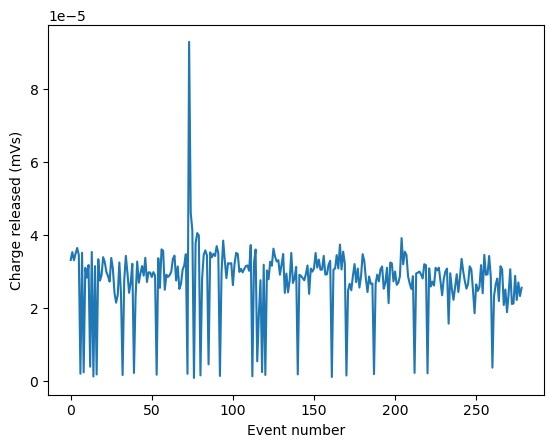

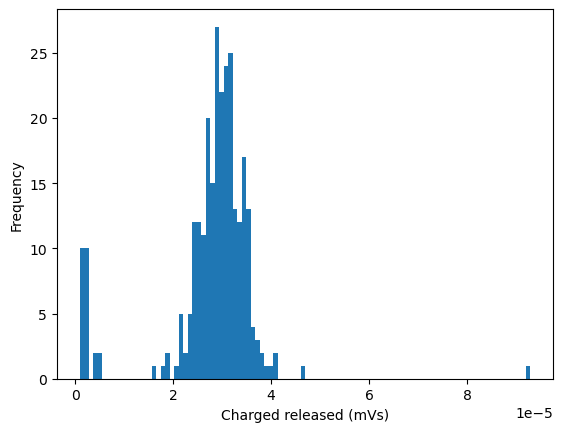

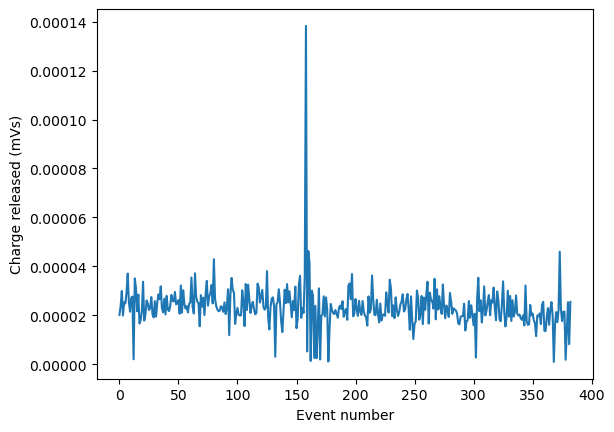

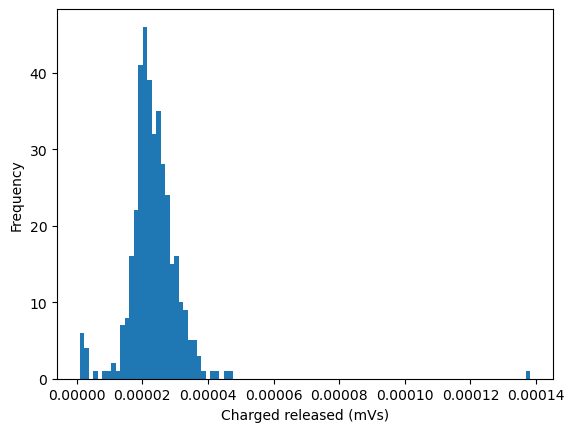

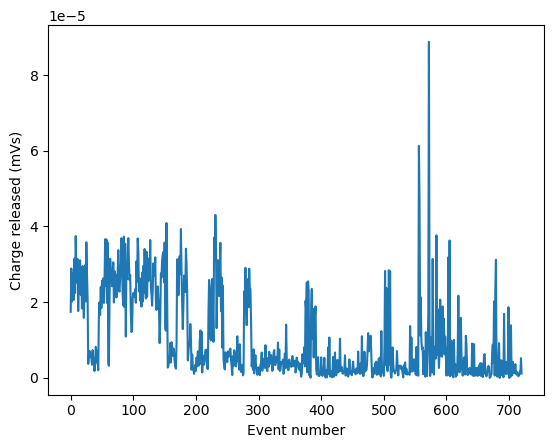

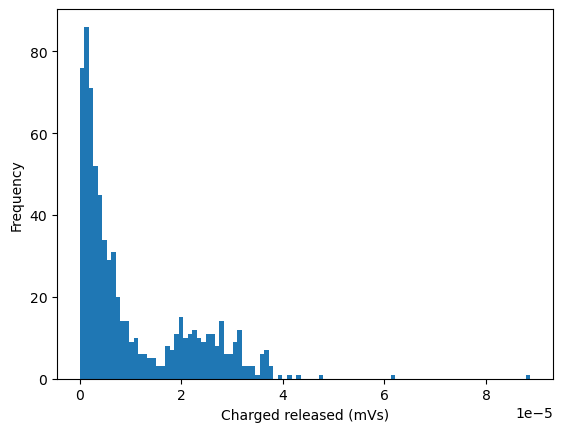

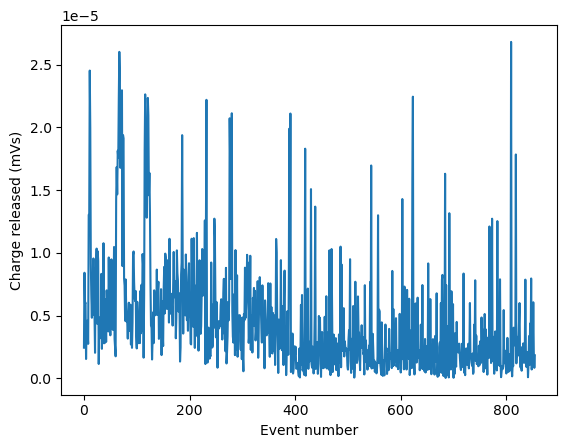

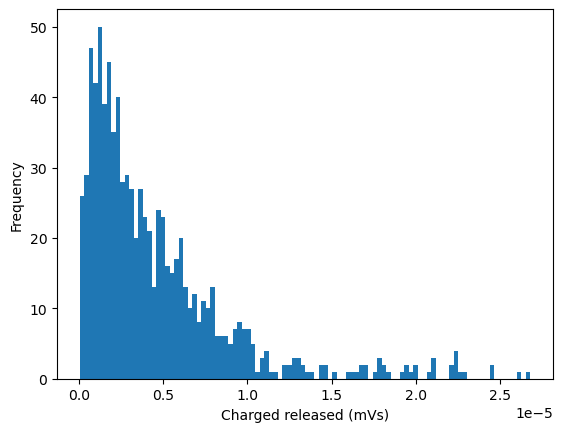

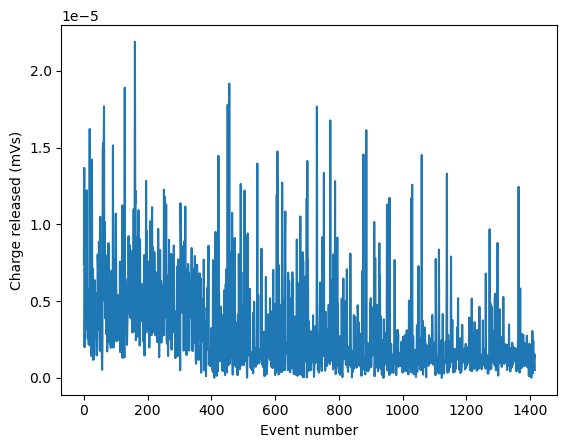

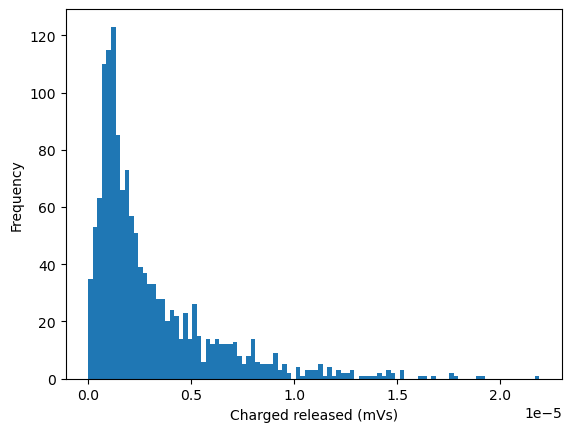

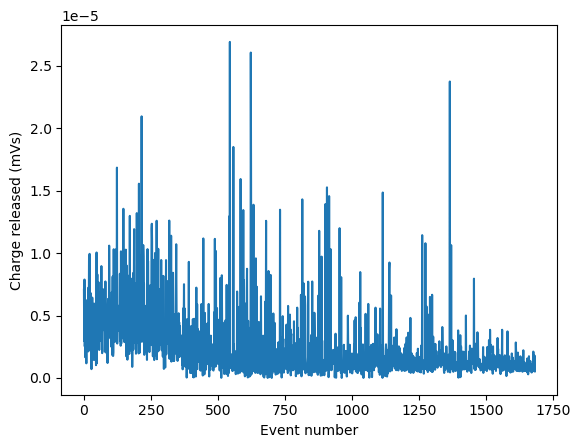

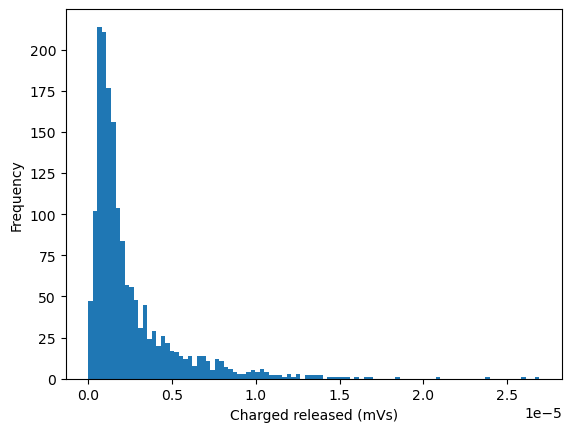

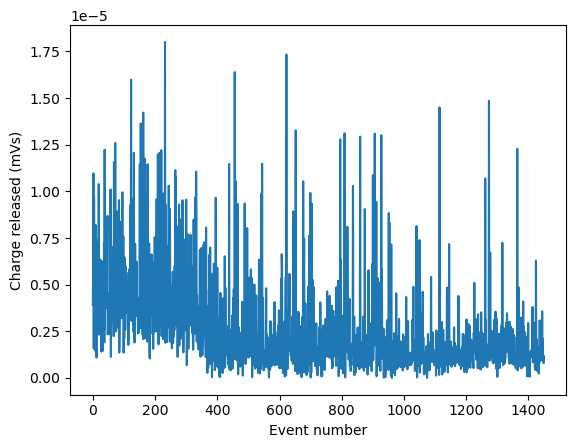

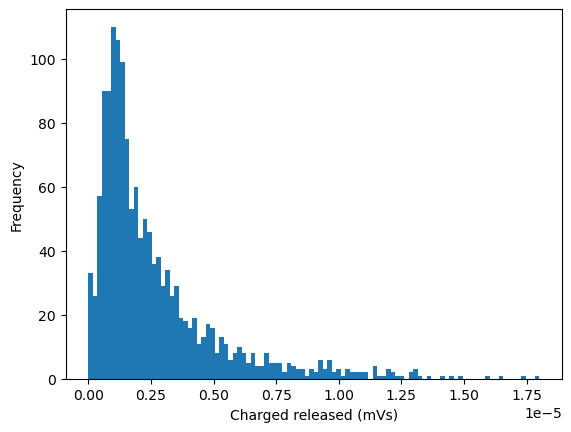

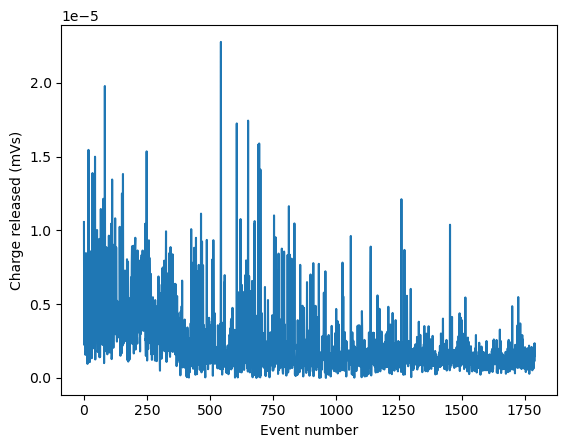

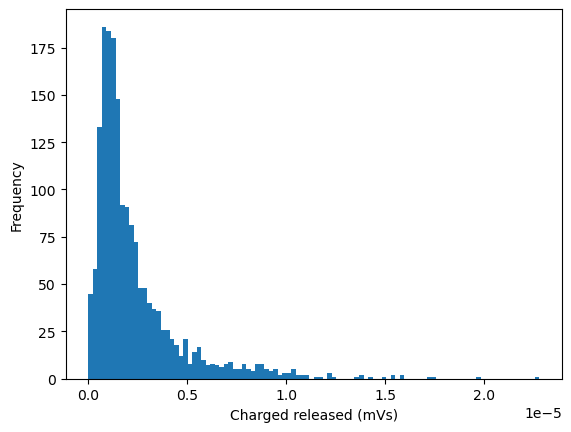

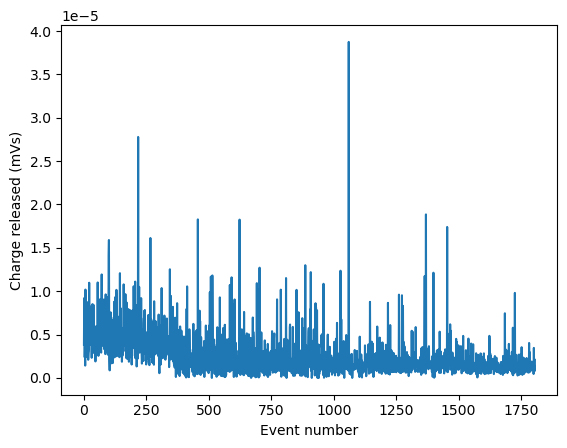

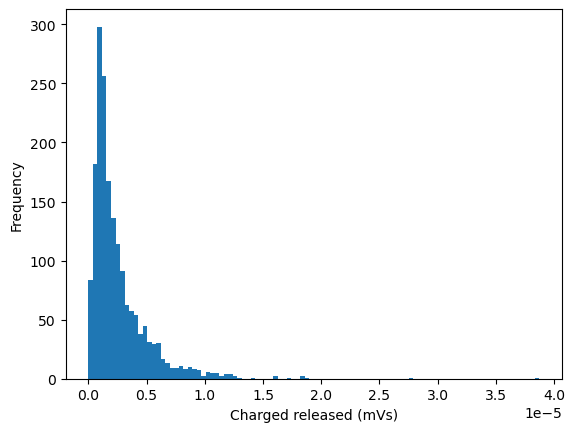

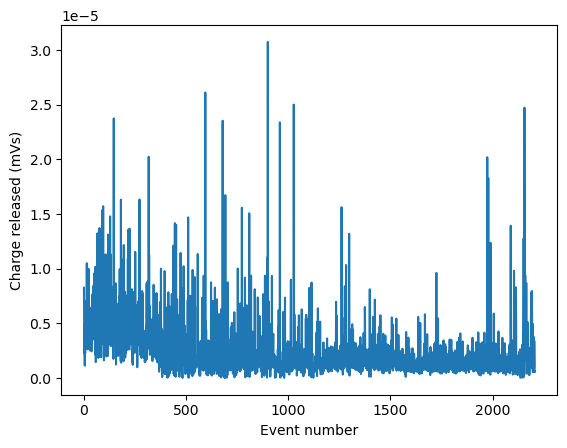

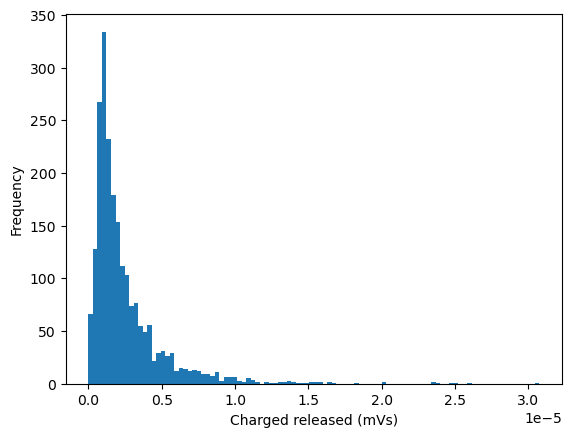

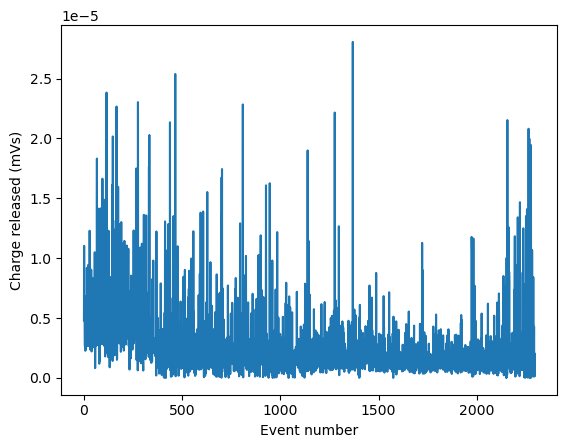

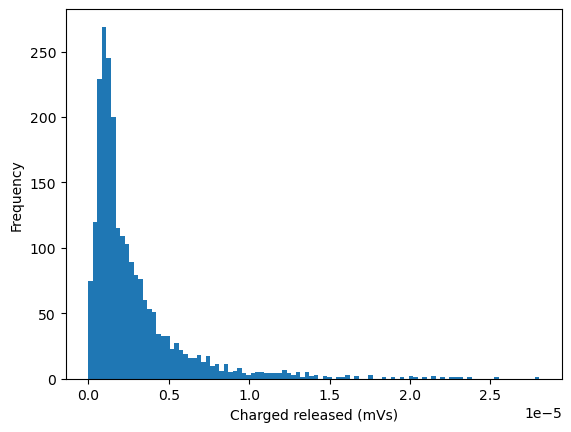

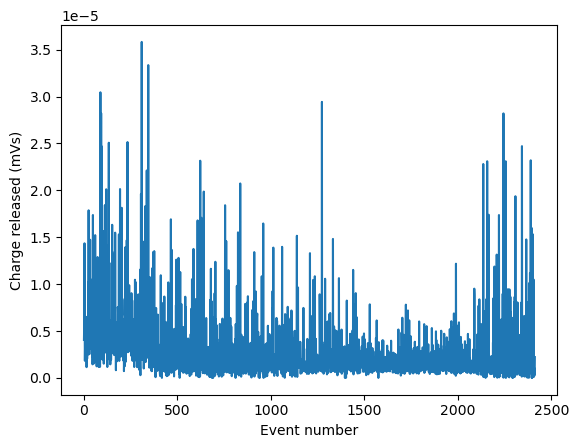

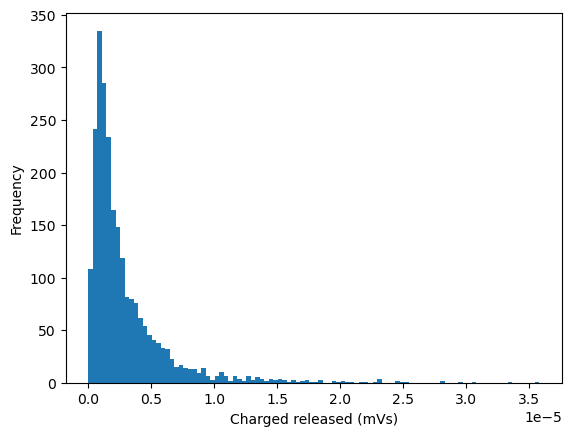

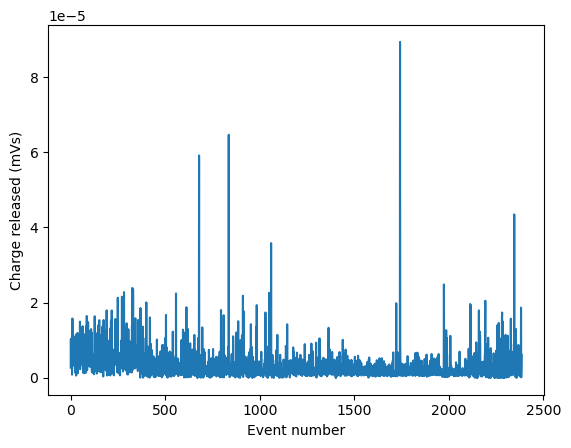

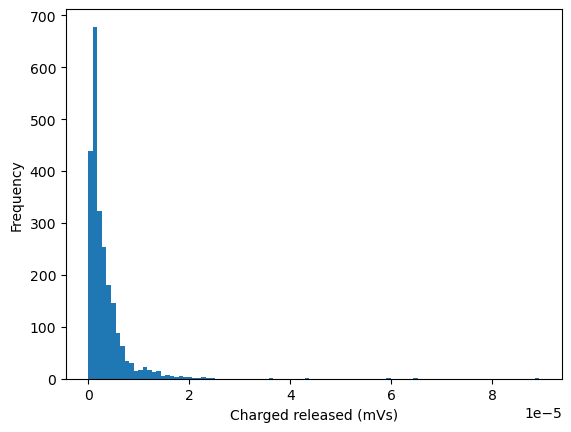

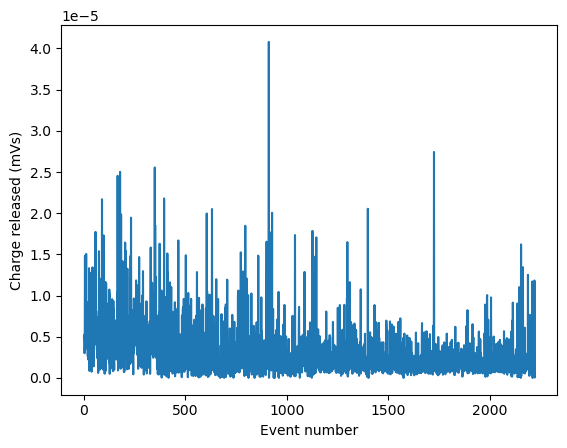

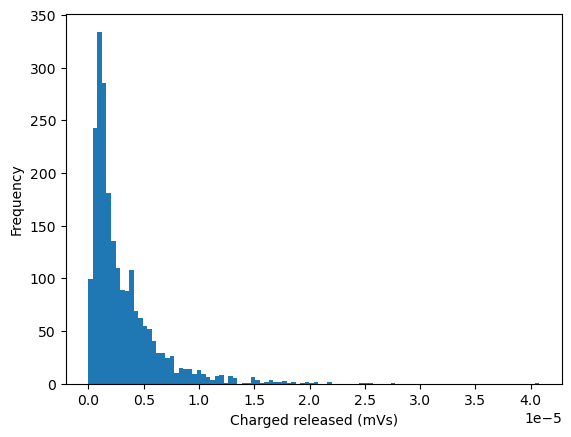

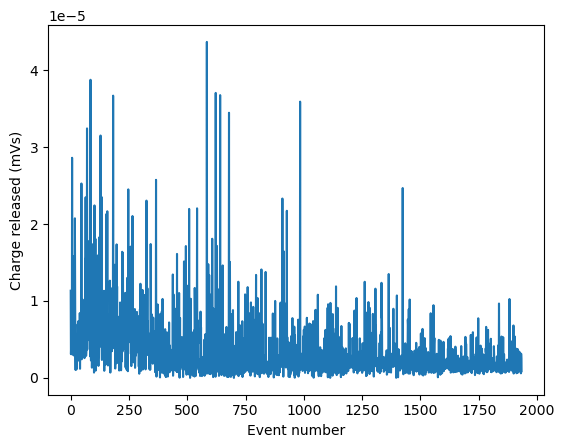

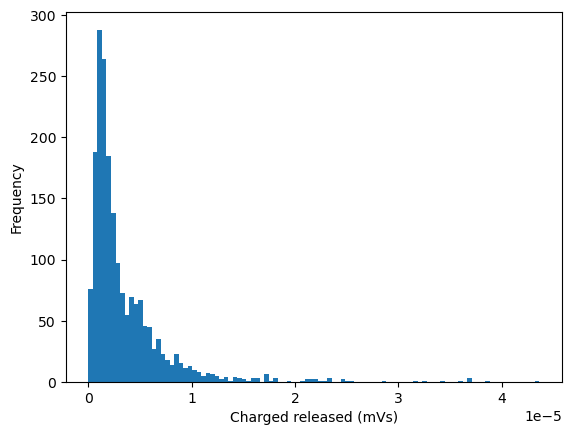

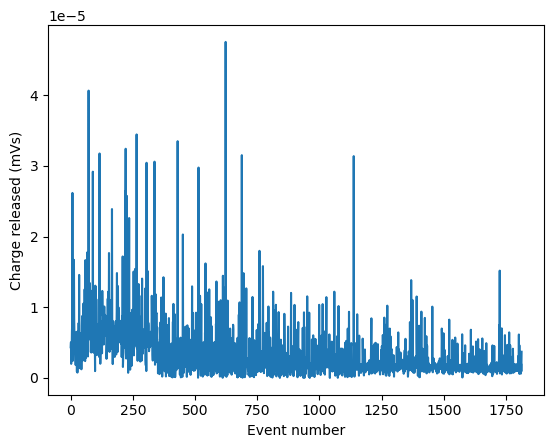

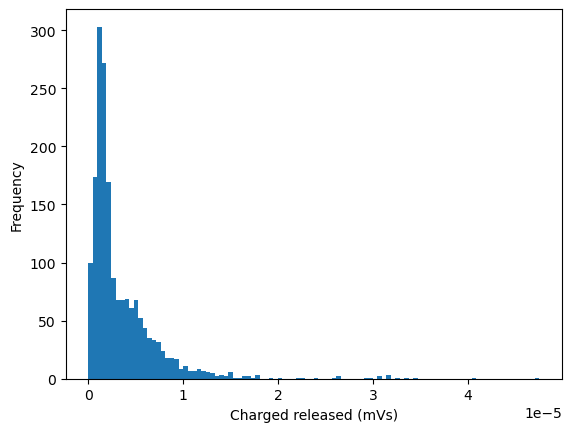

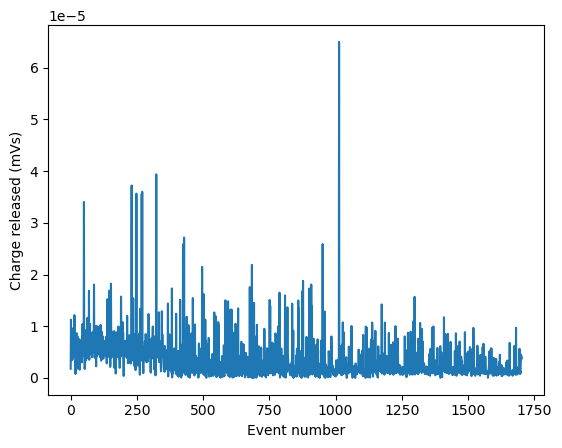

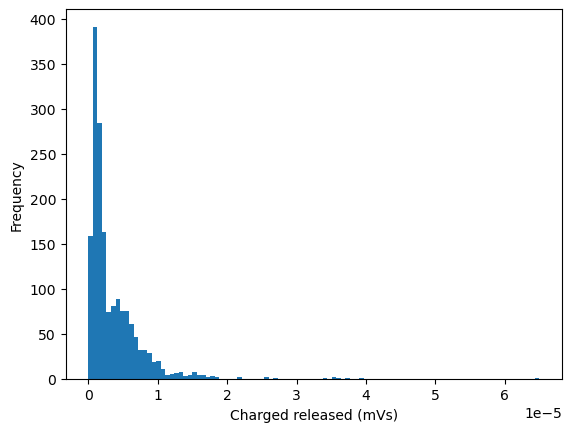

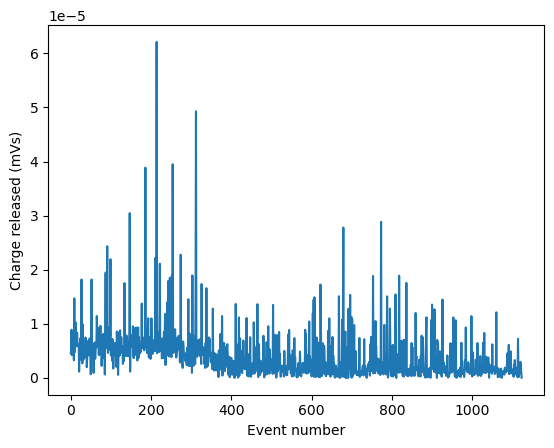

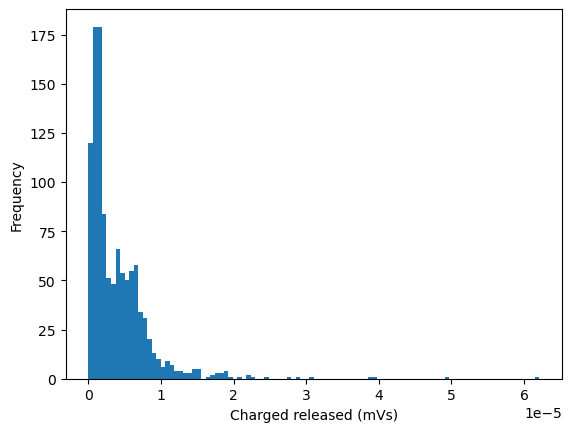

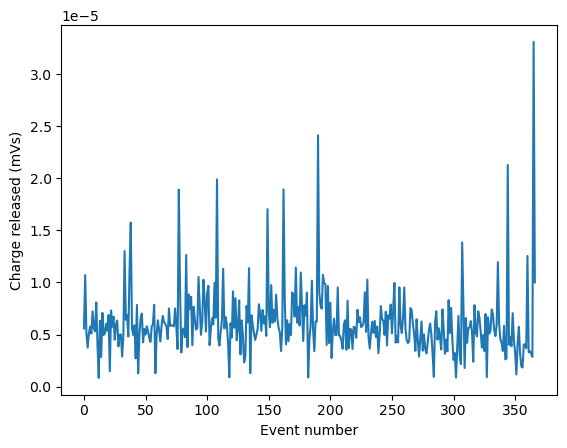

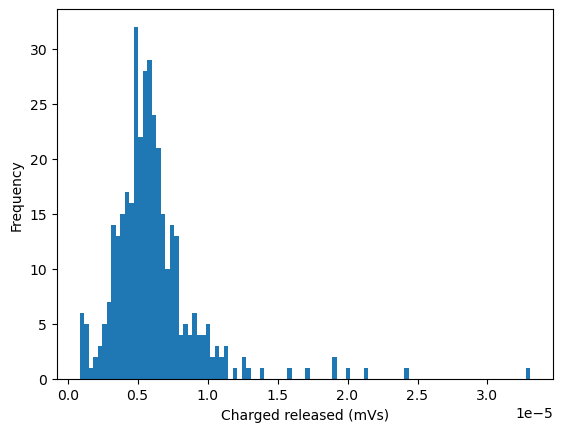

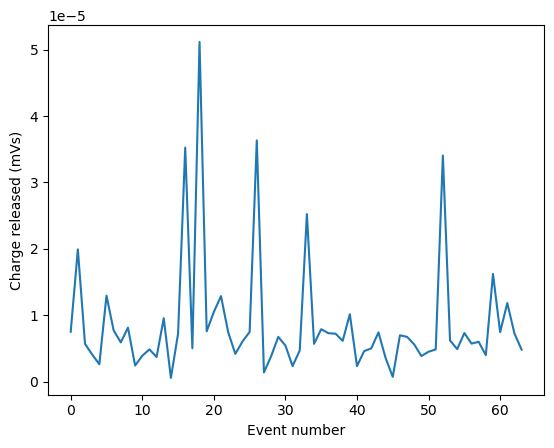

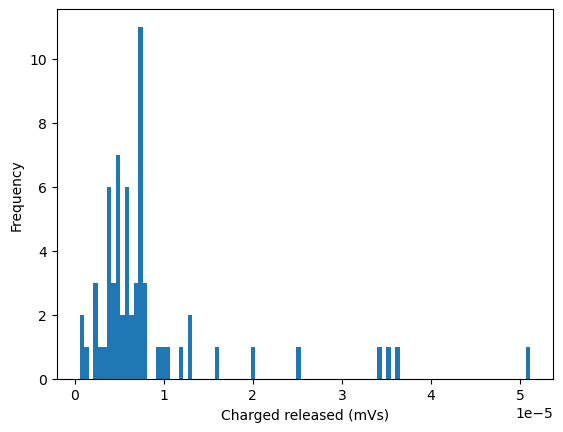

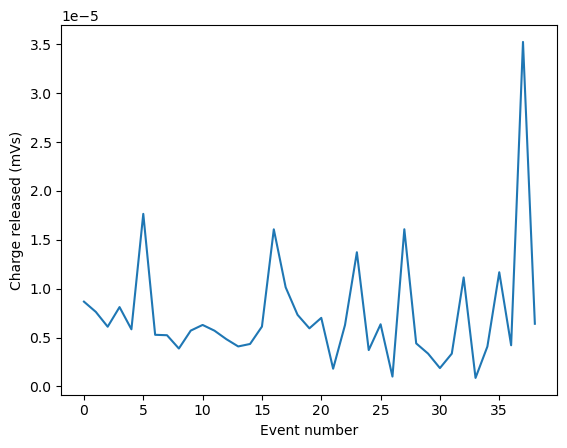

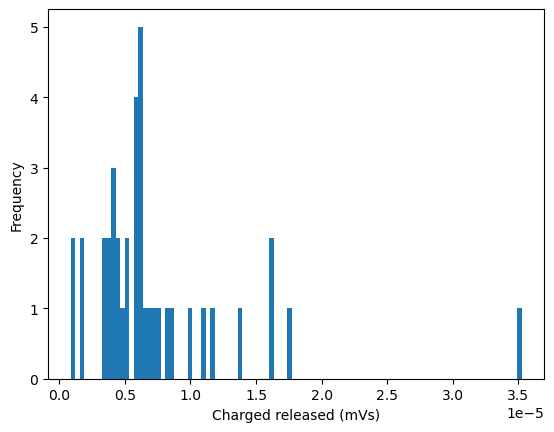

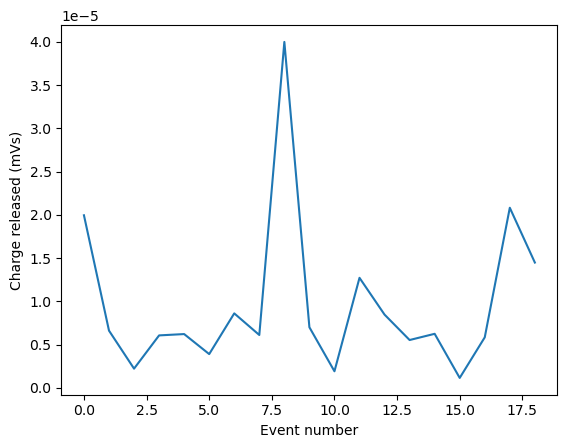

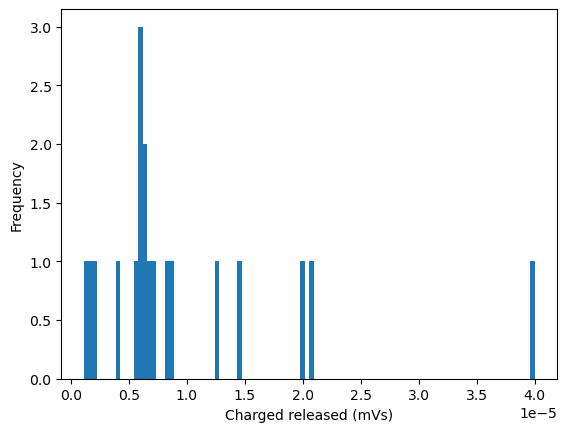

In [7]:
interval = 50.016*10**-6 / len(nRUN1_bs.rwf[0])

areas = np.zeros(len(nRUN1_bs.rwf))

start = 0

for k in range(len(nRUN1_pressure[:,1])):
    window = int(nRUN1_pressure[:,1][k])
    nRUN1_window = nRUN1_bs.rwf[start:window]
    for i in range(len(nRUN1_window)):
        for j in range(int(roi1[i][1] - roi1[i][0])):
            if (nRUN1_window.iloc[i][j] + nRUN1_window.iloc[i][j+1]) > 0:
                areas[int(start+i)] += (nRUN1_window.iloc[i][j] + nRUN1_window.iloc[i][j+1])/2  * interval
    
    plt.plot(areas[start:window]) #check this indexing - graphs don't make sense (always go from high to low from each window)
    plt.xlabel("Event number")
    plt.ylabel("Charge released (mVs)")
    #plt.title("Charge released per event - " + run)
    plt.show()

    hist = plt.hist(areas[start:window], bins=100)
    plt.xlabel("Charged released (mVs)")
    plt.ylabel("Frequency")
    #plt.title(run)
    plt.show()

    start = int(window)

In [18]:
def integrate_nRUN(nRUN_bs, nRUN_pressure, roi, run):
    
    interval = 50.016*10**-6 / len(nRUN1_bs.rwf[0])

    areas = np.zeros(len(nRUN_bs.rwf))

    #start = 0

    rwf_array = nRUN_bs.rwf.values  # 2D NumPy array

    for i in range(len(rwf_array)):
        for j in range(int(roi[i][1] - roi[i][0])):
            if (rwf_array[i][j] + rwf_array[i][j+1]) > 0:
                areas[i] += (rwf_array[i][j] + rwf_array[i][j+1])/2  * interval

    #for k in range(len(nRUN_pressure[:,1])):
    #    window = int(nRUN_pressure[:,1][k])
    #    nRUN_window = nRUN_bs.rwf[start:window]
    #    for i in range(len(nRUN_window)):
    #        for j in range(int(roi[i][1] - roi[i][0])):
    #            if (nRUN_window.iloc[i][j] + nRUN_window.iloc[i][j+1]) > 0:
    #                areas[int(start+i)] += (nRUN_window.iloc[i][j] + nRUN_window.iloc[i][j+1])/2  * interval
    
    #    plt.plot(areas[start:window])
    #    plt.xlabel("Event number")
    #    plt.ylabel("Charge released (mVs)")
    #    plt.title("Charge released per event - " + run)
    #    plt.show()

    #    hist = plt.hist(areas[start:window], bins=100)
    #    plt.xlabel("Charged released (mVs)")
    #    plt.ylabel("Frequency")
    #    plt.title(run)
    #    plt.show()

    #    start = int(window)

    return areas

In [143]:
areas1 = integrate_nRUN(nRUN1_bs, nRUN1_pressure, roi[0], "nRUN1")
areas2 = integrate_nRUN(nRUN2_bs, nRUN2_pressure, roi[1], "nRUN2")
areas3 = integrate_nRUN(nRUN3_bs, nRUN3_pressure, roi[2], "nRUN3")
areas4 = integrate_nRUN(nRUN4_bs, nRUN4_pressure, roi[3], "nRUN4")
areas5 = integrate_nRUN(nRUN5_bs, nRUN5_pressure, roi[4], "nRUN5")

In [ ]:
p_windows = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]

def plot_windows(areas, nRUN_pressure, run):
    
    start = 0
    
    for k in range(len(nRUN_pressure[:,1])):

        window = int(nRUN_pressure[:,1][k])

        plt.plot(areas[start:window])
        plt.xlabel("Event number")
        plt.ylabel("Charge released (mVs)")
        plt.title("Charge released per event - " + run + " " + str(p_windows[k]) + "-" + str(p_windows[k+1]) + "mBar")
        plt.show()

        hist = plt.hist(areas[start:window], bins=100)
        plt.xlabel("Charged released (mVs)")
        plt.ylabel("Frequency")
        plt.title(run + " " + str(p_windows[k]) + "-" + str(p_windows[k+1]) + "mBar")
        plt.show()

        start = int(window)

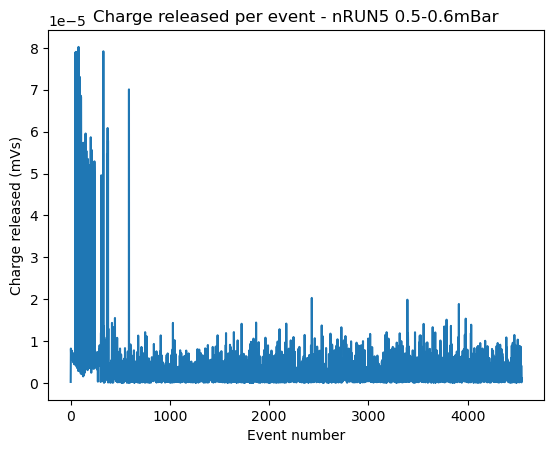

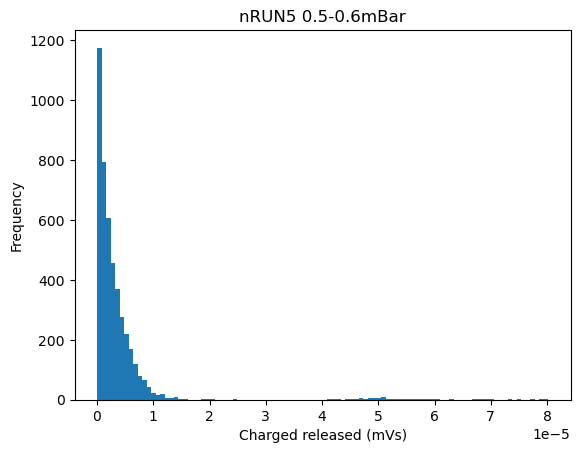

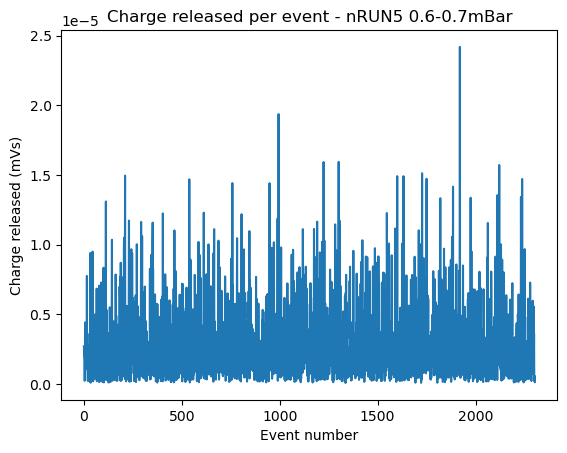

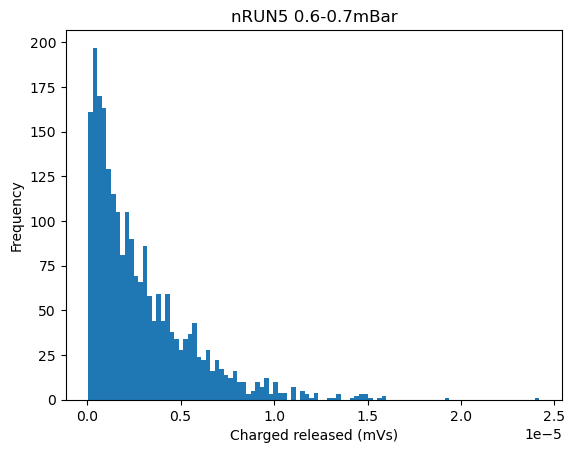

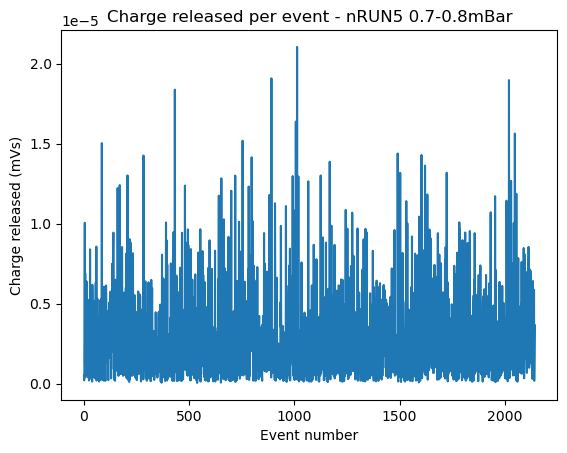

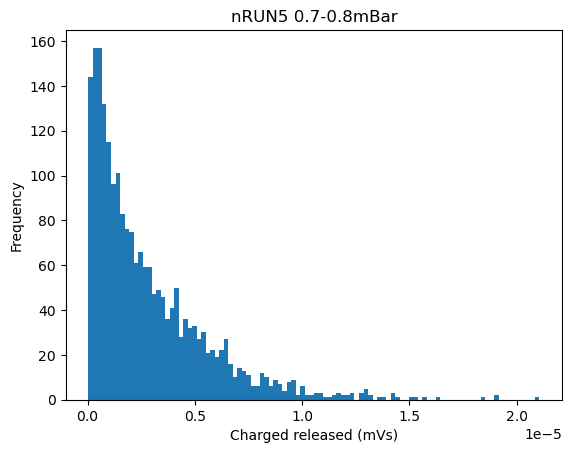

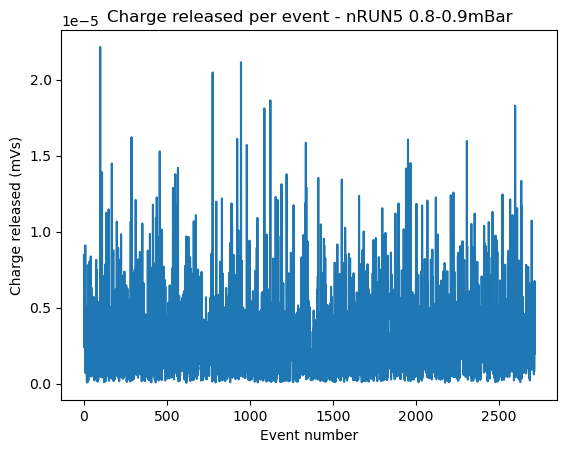

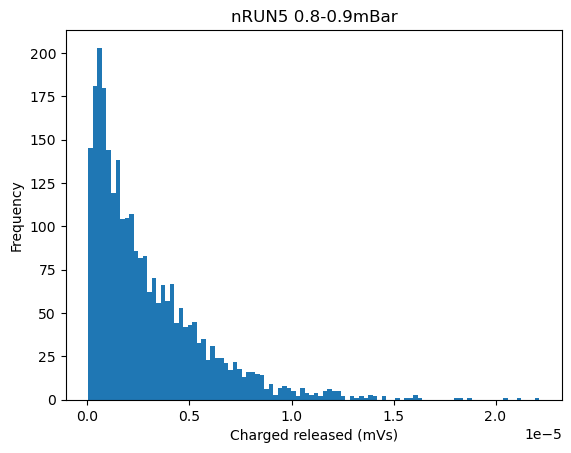

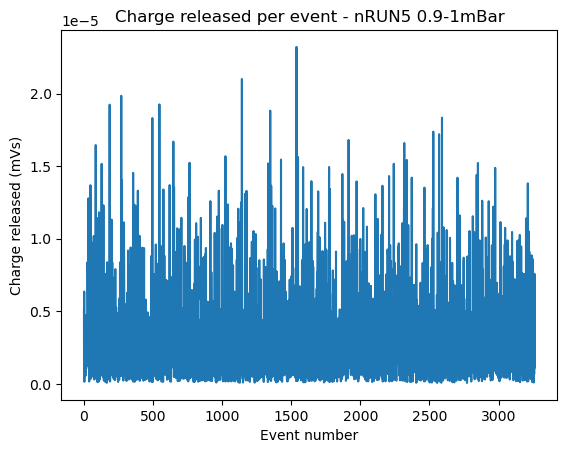

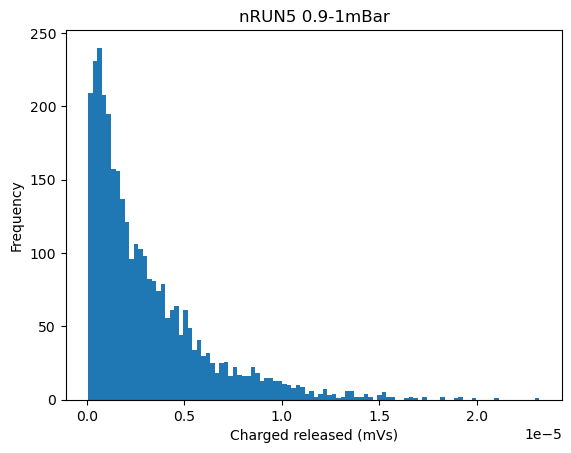

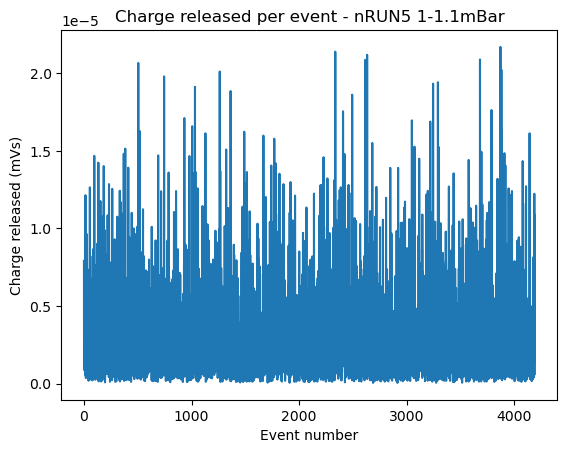

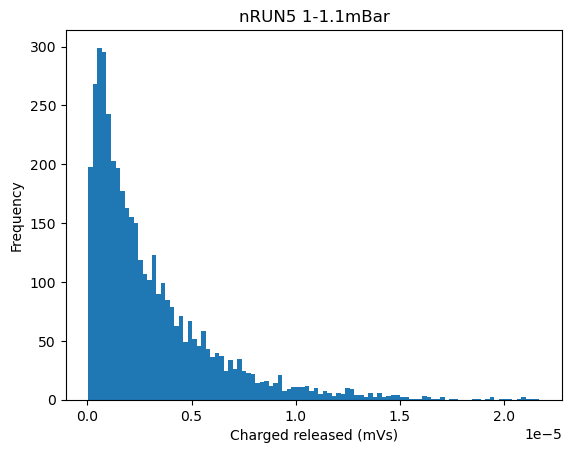

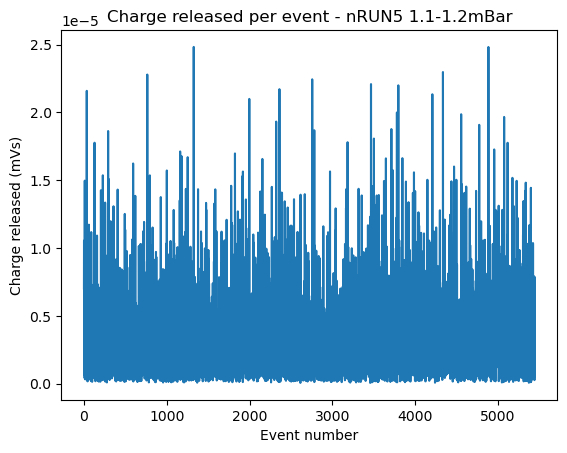

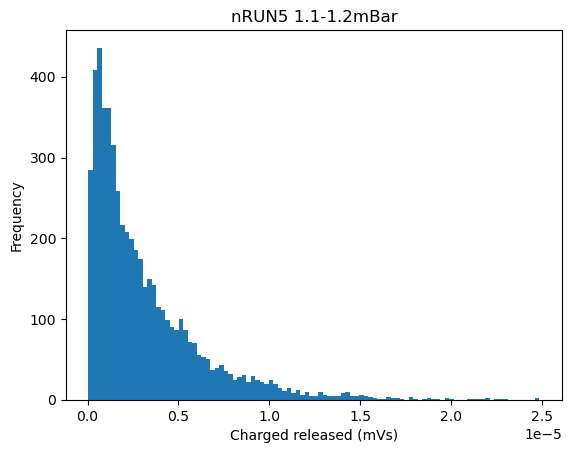

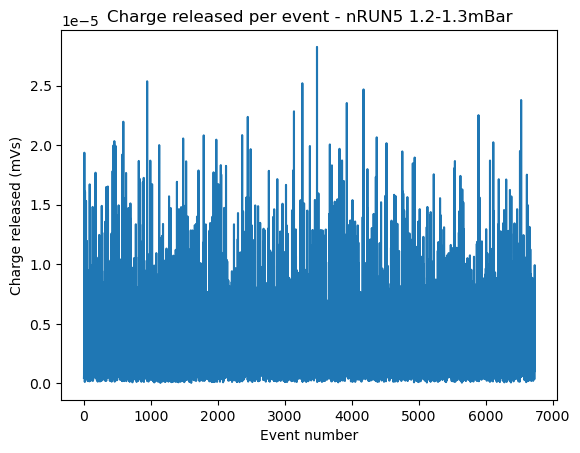

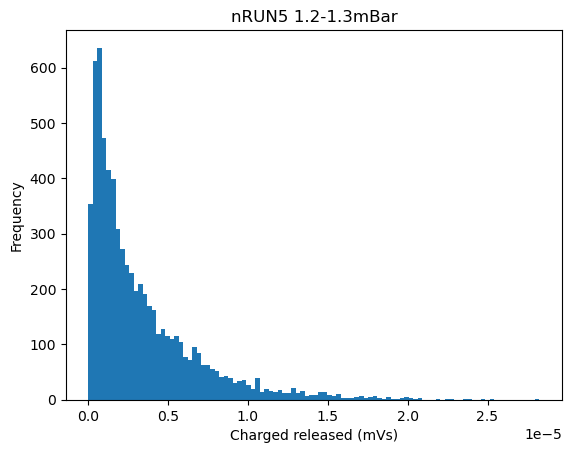

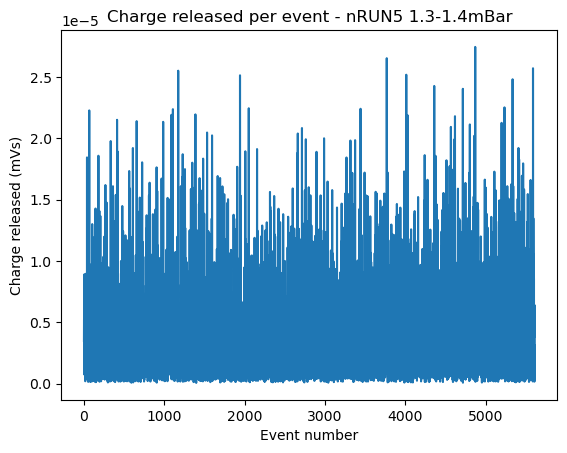

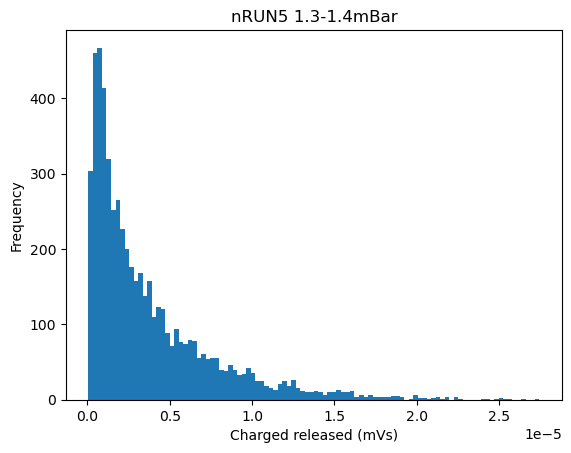

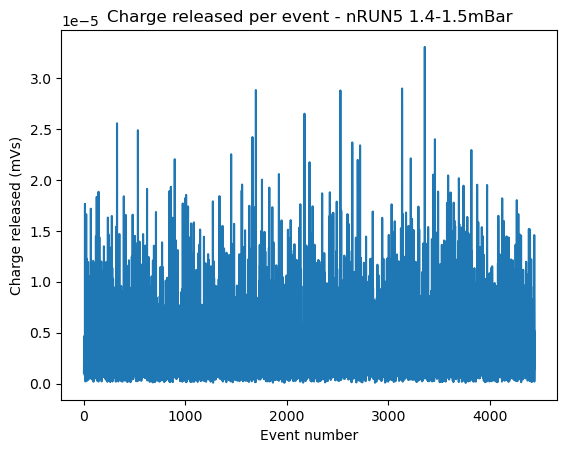

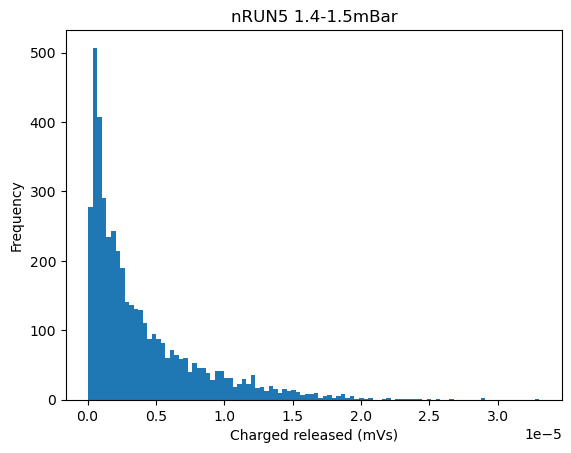

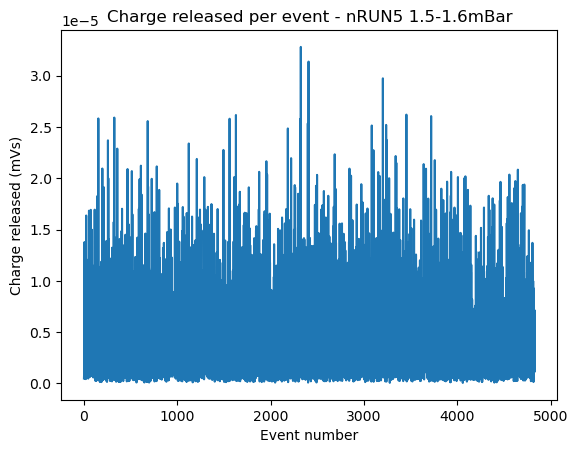

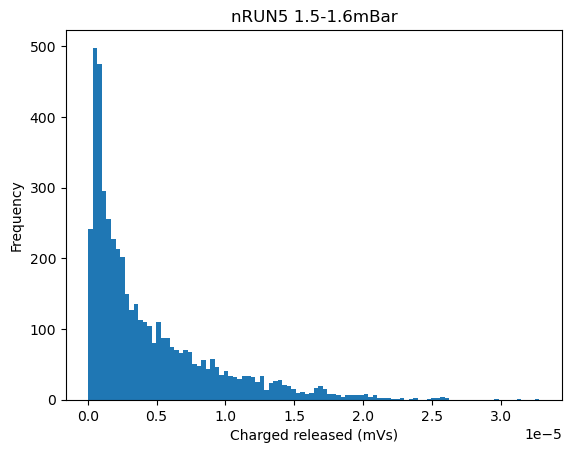

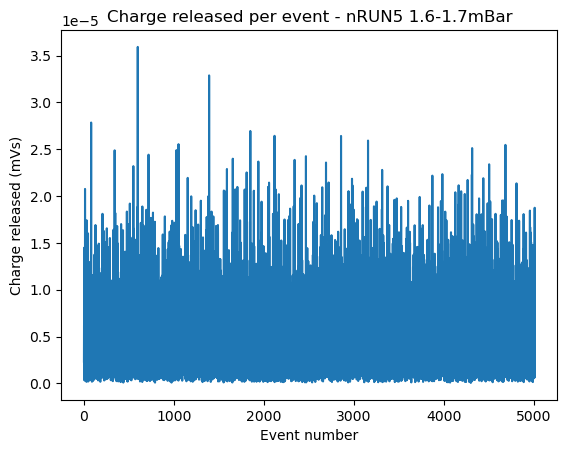

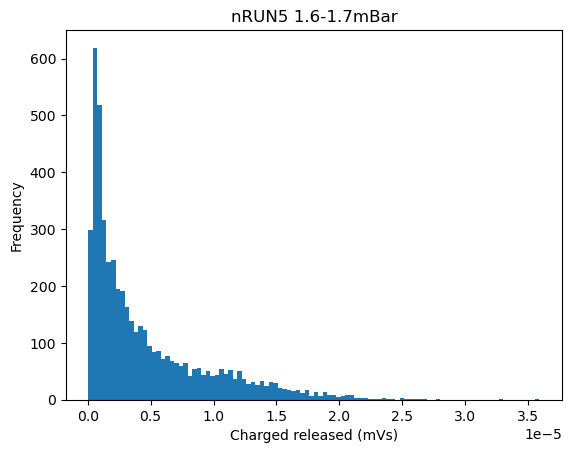

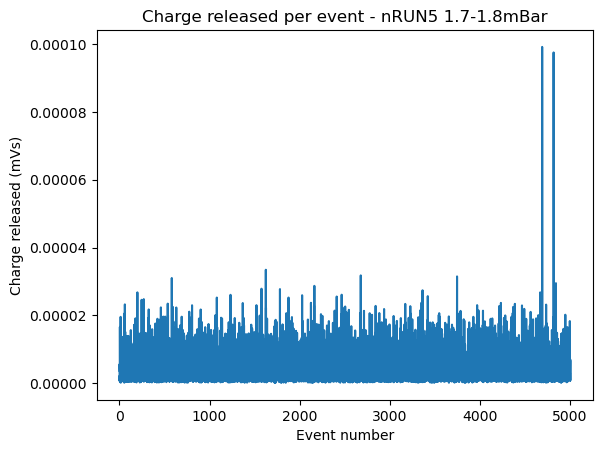

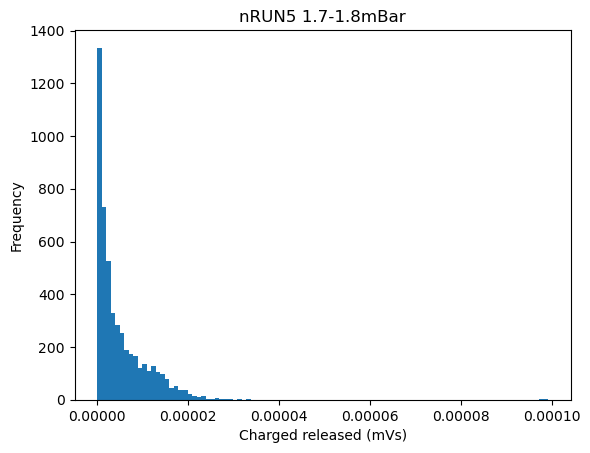

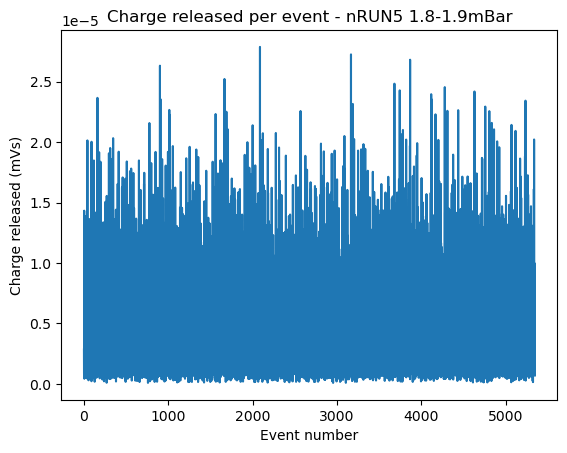

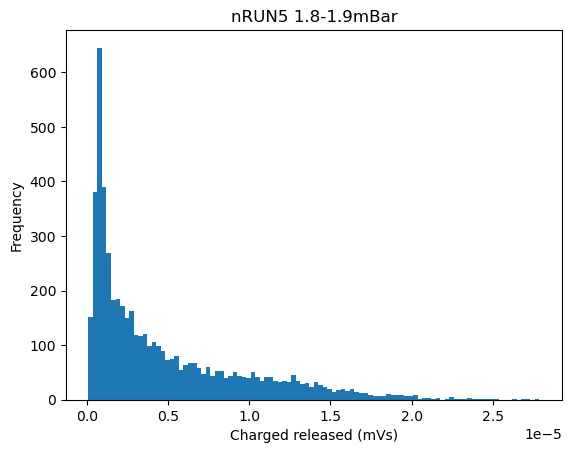

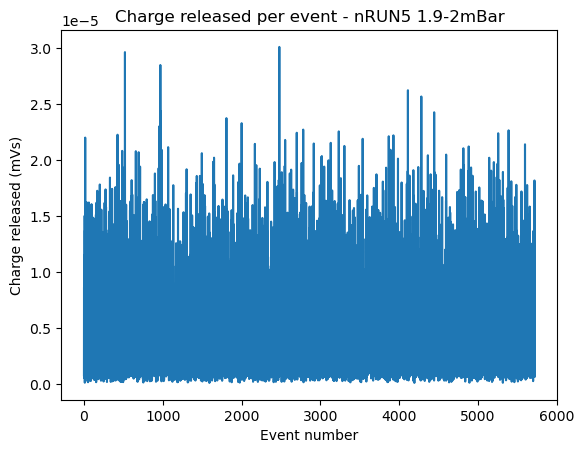

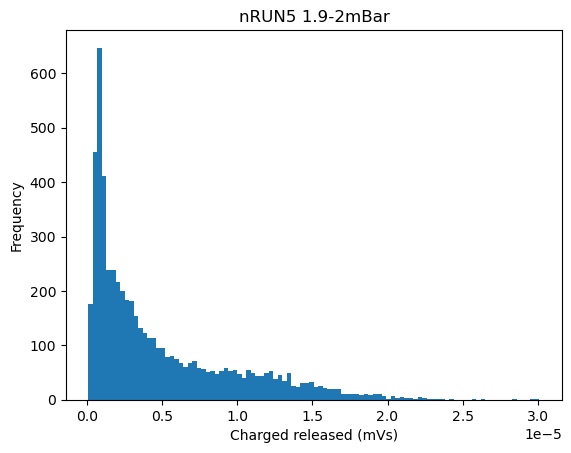

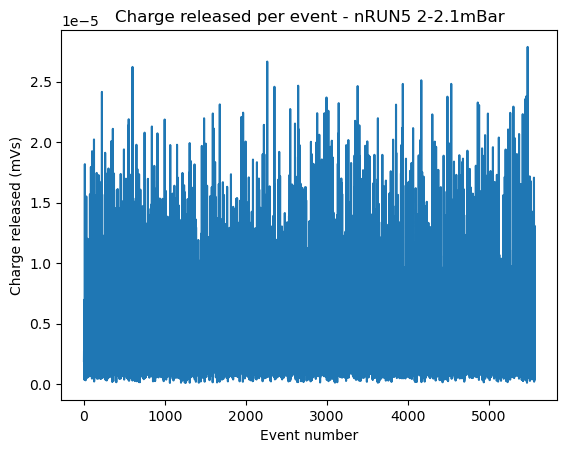

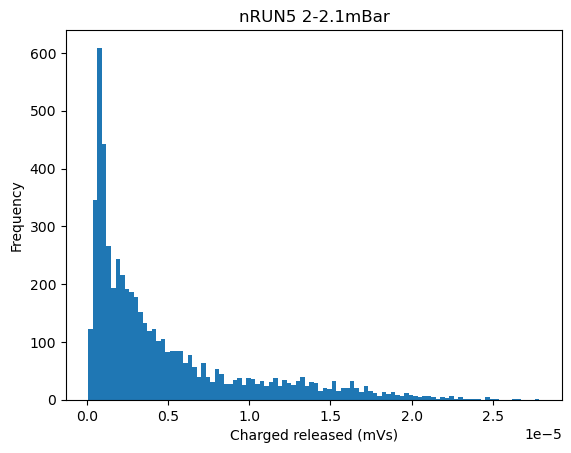

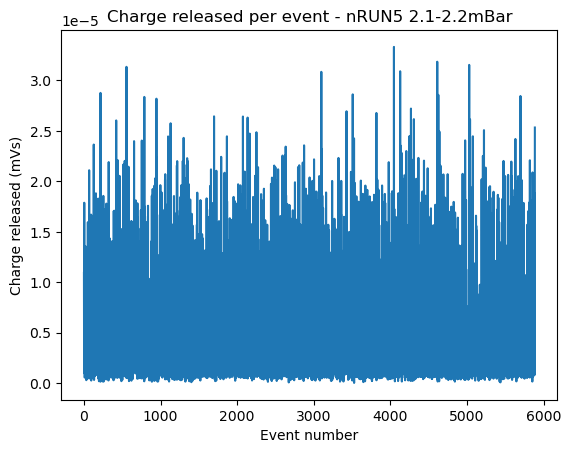

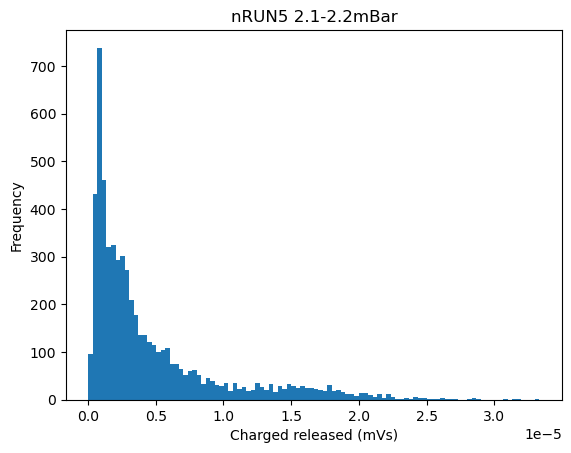

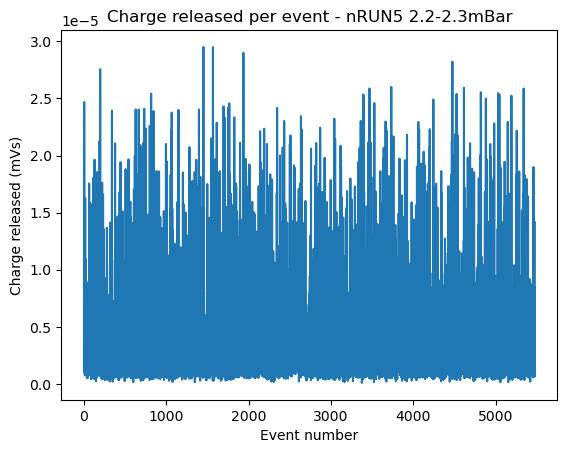

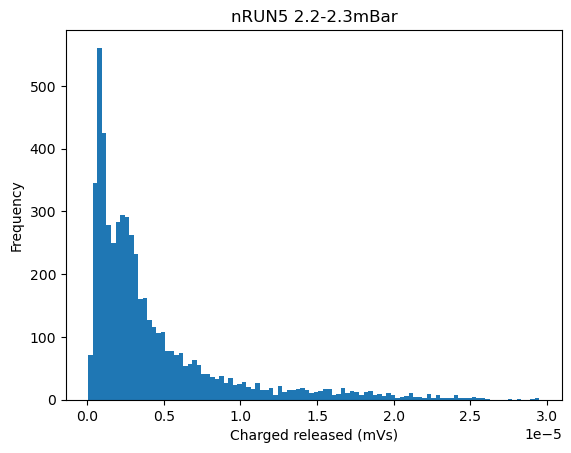

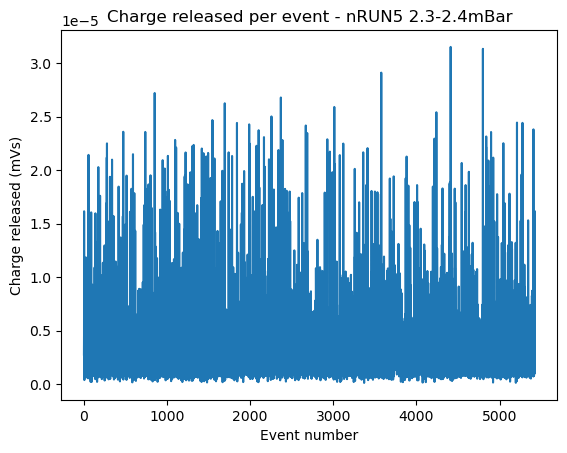

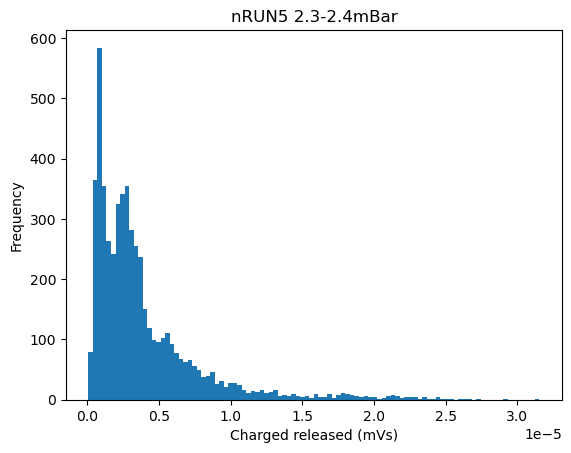

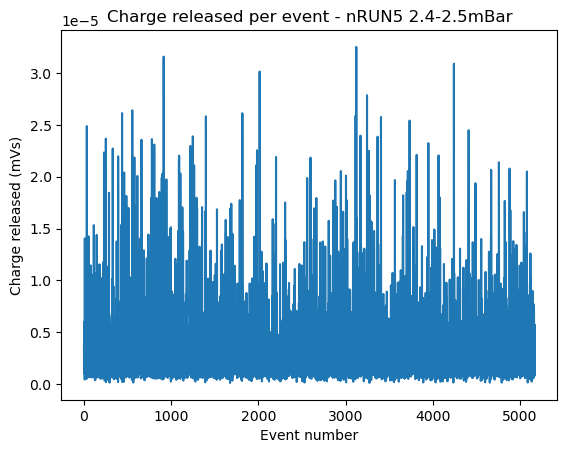

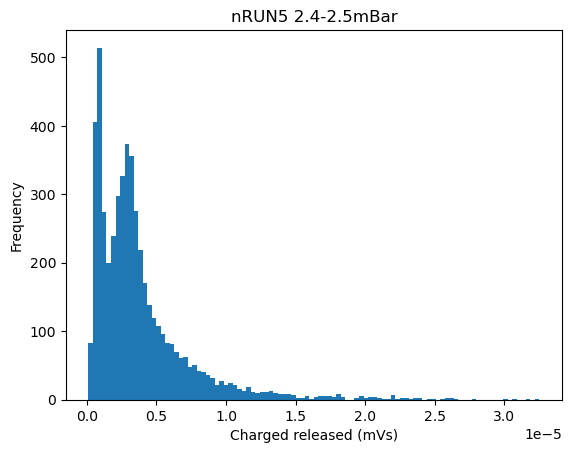

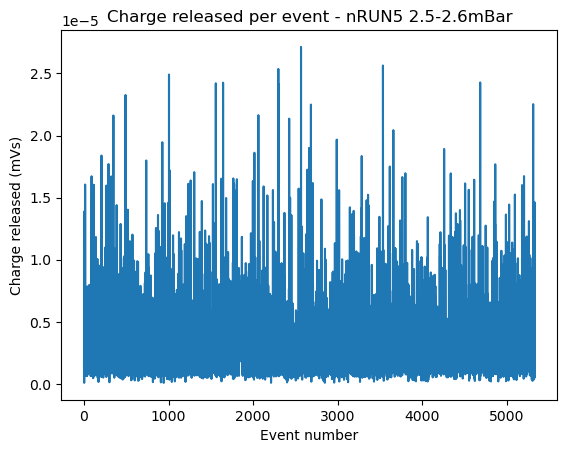

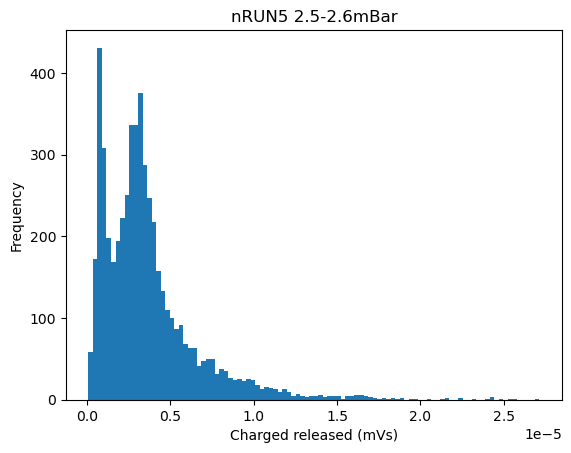

In [32]:
plot_windows(areas5, nRUN5_pressure, "nRUN5")

In [58]:
from scipy.optimize import curve_fit
from scipy.special import erfc

# Define the exponentially modified Gaussian (EMG) PDF
def emg_pdf(x, mu, sigma, lam, A):
    """
    Exponentially modified Gaussian (EMG) distribution for fitting.
    """
    return A * (lam / 2) * np.exp((lam / 2) * (2 * mu + lam * sigma**2 - 2 * x)) * erfc((mu + lam * sigma**2 - x) / (np.sqrt(2) * sigma))

def emg_fit(data, run, plot=True):
    # Create histogram
    hist_values, bin_edges = np.histogram(data, bins=100)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints of bins

    # Initial parameter guesses
    mu_guess = bin_centers[np.argmax(hist_values)]  # Peak of histogram
    sigma_guess = np.std(data) / 3
    lam_guess = 1 / sigma_guess  # Inverse of width, rough guess
    A_guess = max(hist_values)

    initial_guess = [mu_guess, sigma_guess, lam_guess, A_guess]

    # Perform curve fitting
    try:
        popt, pcov = curve_fit(emg_pdf, bin_centers, hist_values, p0=initial_guess, maxfev=50000)
    
        # Extract fit parameters with errors
        mu_fit, sigma_fit, lam_fit, A_fit = popt
        mu_err, sigma_err, lam_err, A_err = np.sqrt(np.diag(pcov))

        # Generate fitted curve
        x_fit = np.linspace(min(data), max(data), 500)
        y_fit = emg_pdf(x_fit, *popt)

        if plot==True:# Plot histogram and fit
            plt.hist(data, bins=100, alpha=0.5, label="Data Histogram")
            plt.plot(x_fit, y_fit, 'r-', label=(
                f'EMG Fit:\n'
                f'μ={mu_fit:.2e}±{mu_err:.2e}, '
                f'σ={sigma_fit:.2e}±{sigma_err:.2e}, '
                f'λ={lam_fit:.2e}±{lam_err:.2e}'
            ))
            plt.xlabel("Charge released (mVs)")
            plt.ylabel("Counts")
            plt.title("Exponentially Modified Gaussian Fit - RUN" + run)
            plt.legend()
            plt.show()

    except RuntimeError as e:
        print(f"Fit failed: {e}")
    
    return mu_fit, sigma_fit, lam_fit, mu_err, sigma_err, lam_err

In [60]:
def fit_routine(areas, nRUN_pressure, run, plot=True):
    start = 0
    fitparams = np.zeros((len(nRUN_pressure[:,1]), 6))
    for k in range(len(nRUN_pressure[:,1])):
        window = int(nRUN_pressure[:,1][k])
        data = areas[start:window]
        fitparams[k] = emg_fit(data, run + " " + str(p_windows[k]) + "-" + str(p_windows[k+1]) + "mBar", plot)
        start = int(window)
    return fitparams

C:\Users\louis\AppData\Local\Temp\ipykernel_7148\2202234054.py:9: RuntimeWarning: overflow encountered in exp
  return A * (lam / 2) * np.exp((lam / 2) * (2 * mu + lam * sigma**2 - 2 * x)) * erfc((mu + lam * sigma**2 - x) / (np.sqrt(2) * sigma))
C:\Users\louis\AppData\Local\Temp\ipykernel_7148\2202234054.py:9: RuntimeWarning: overflow encountered in multiply
  return A * (lam / 2) * np.exp((lam / 2) * (2 * mu + lam * sigma**2 - 2 * x)) * erfc((mu + lam * sigma**2 - x) / (np.sqrt(2) * sigma))
C:\Users\louis\AppData\Local\Temp\ipykernel_7148\2202234054.py:9: RuntimeWarning: invalid value encountered in multiply
  return A * (lam / 2) * np.exp((lam / 2) * (2 * mu + lam * sigma**2 - 2 * x)) * erfc((mu + lam * sigma**2 - x) / (np.sqrt(2) * sigma))


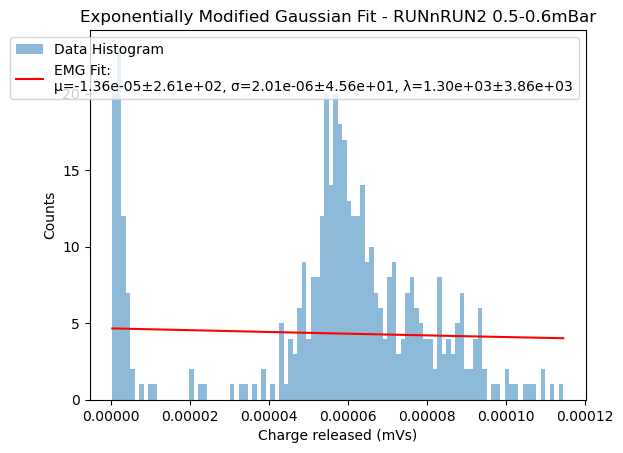

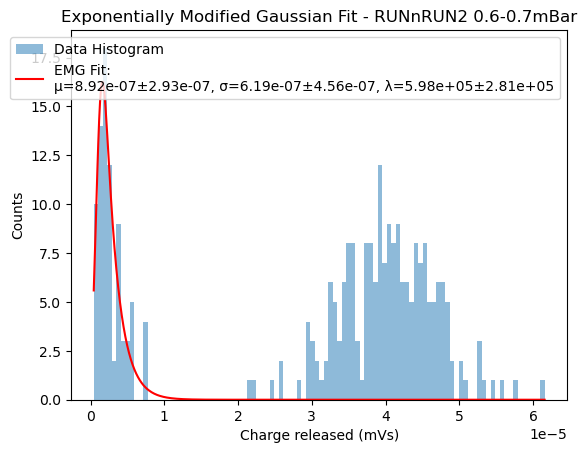

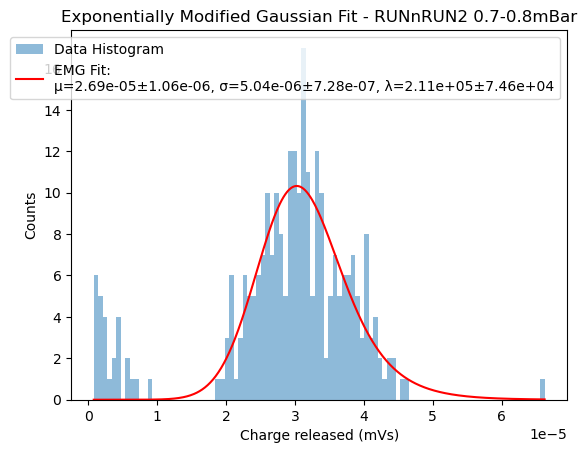

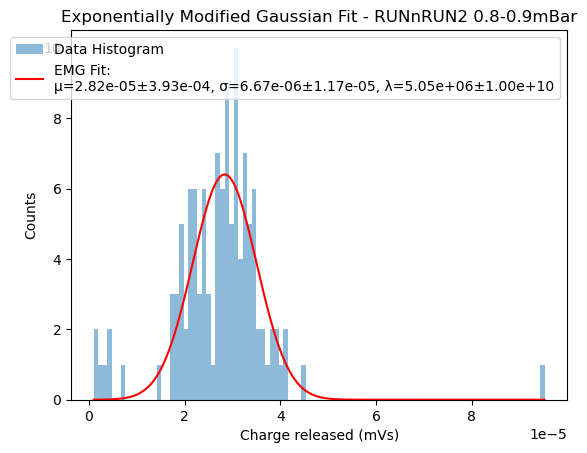

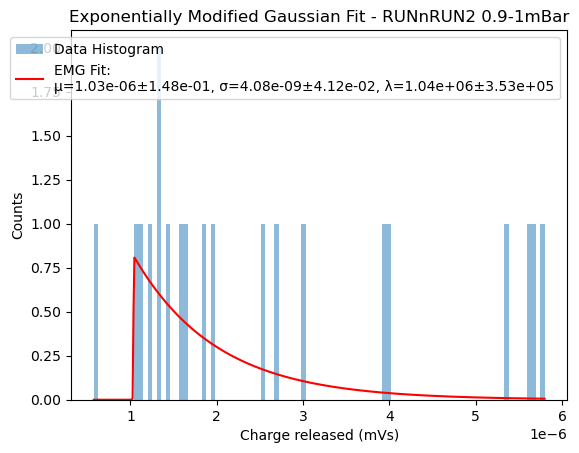

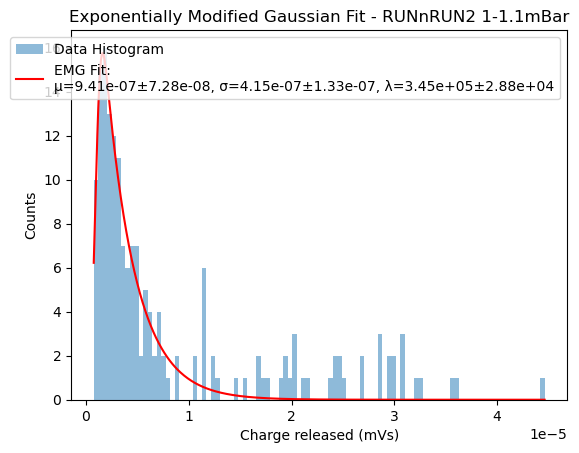

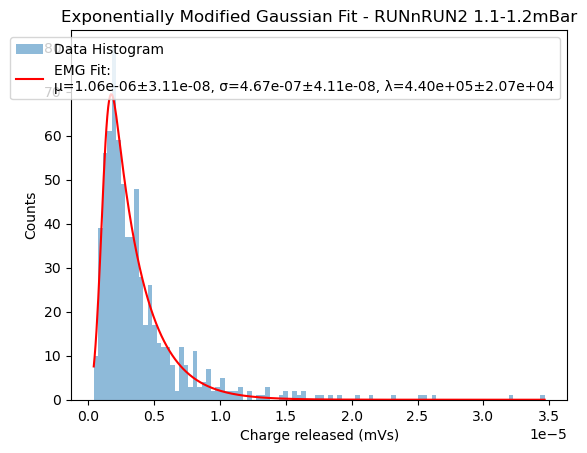

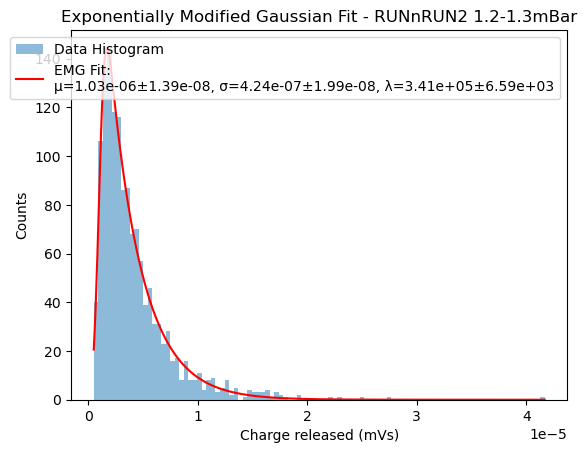

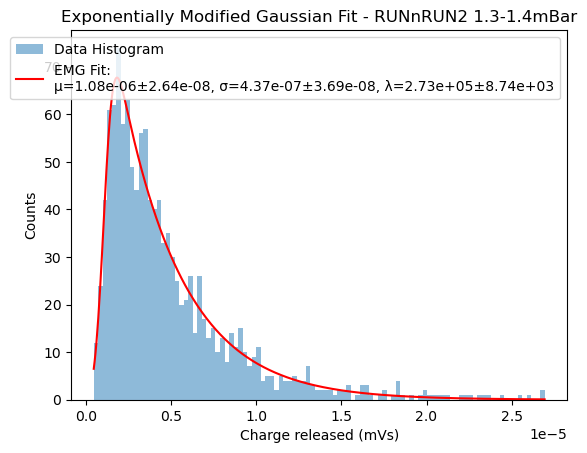

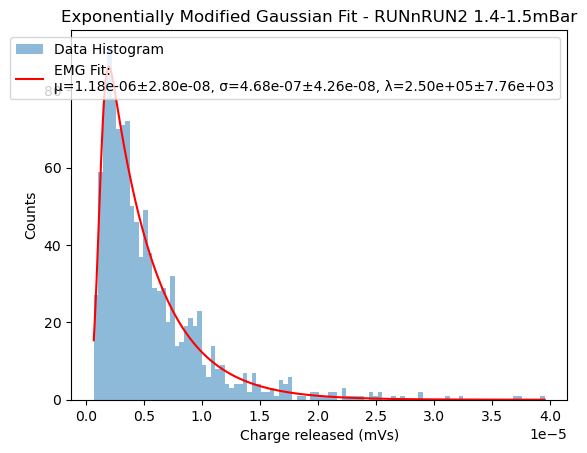

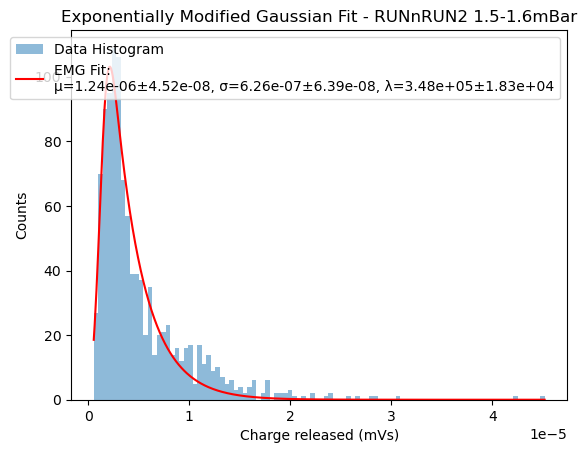

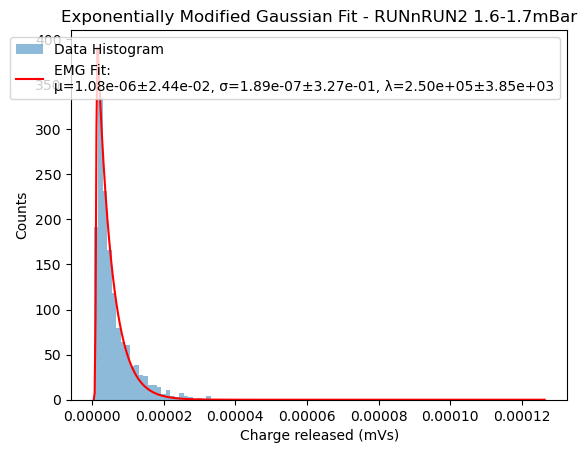

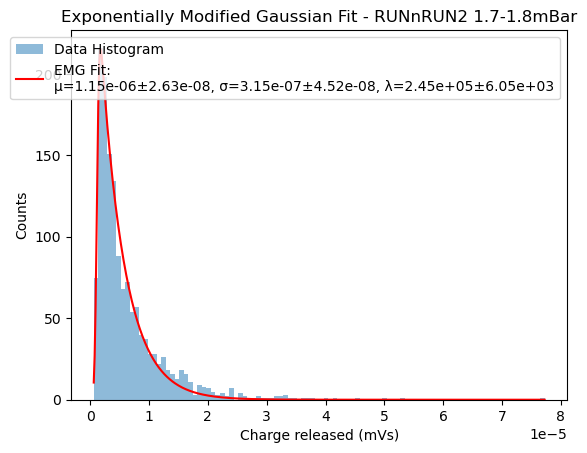

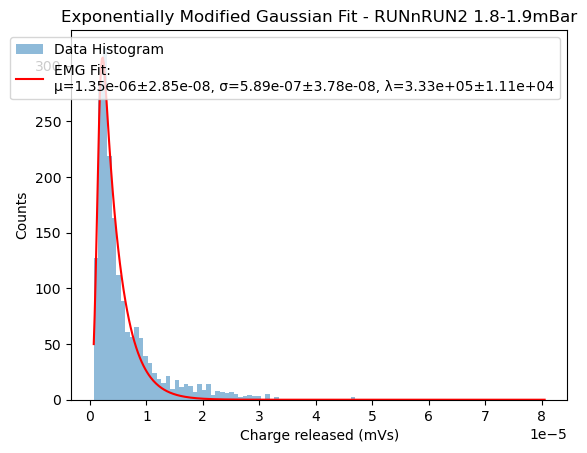

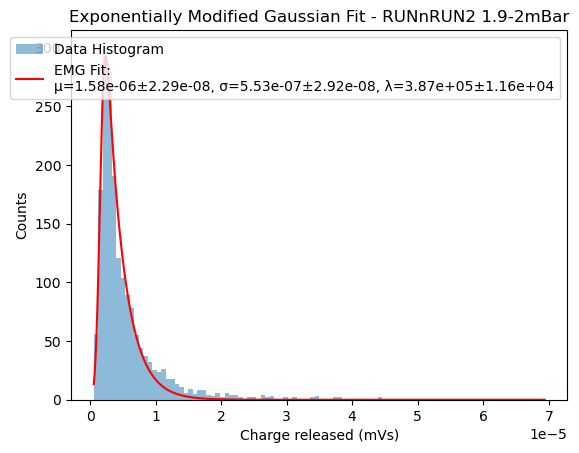

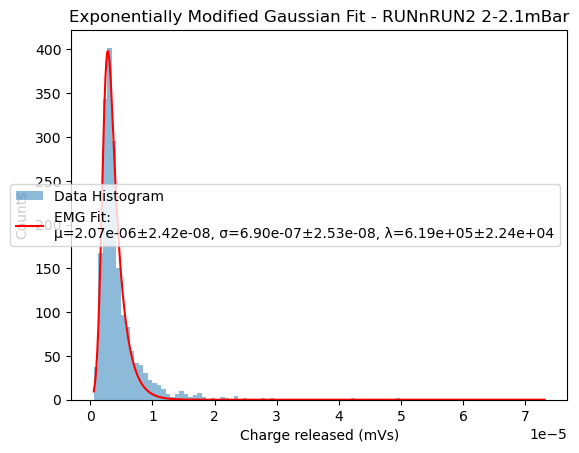

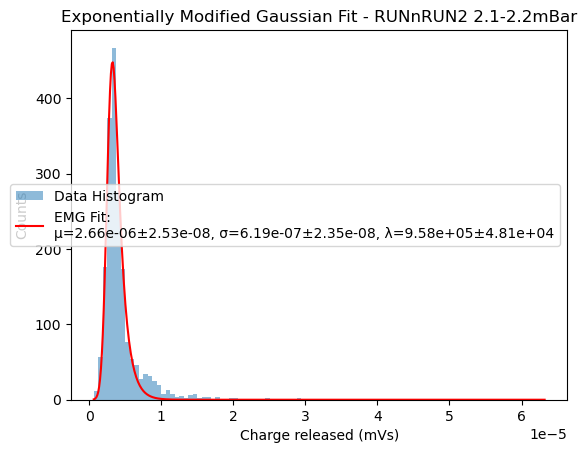

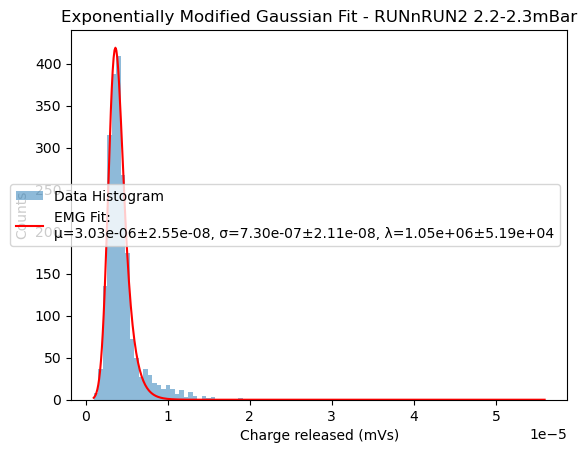

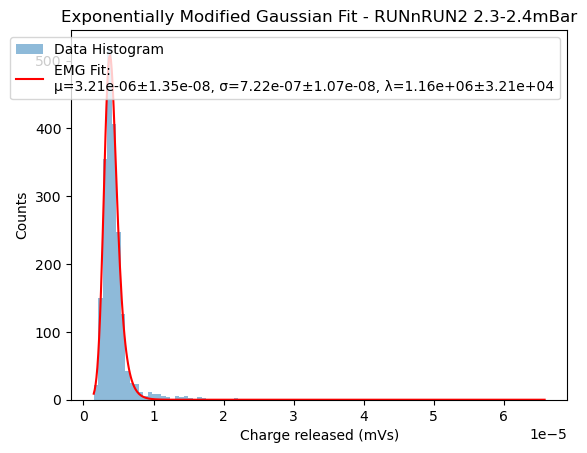

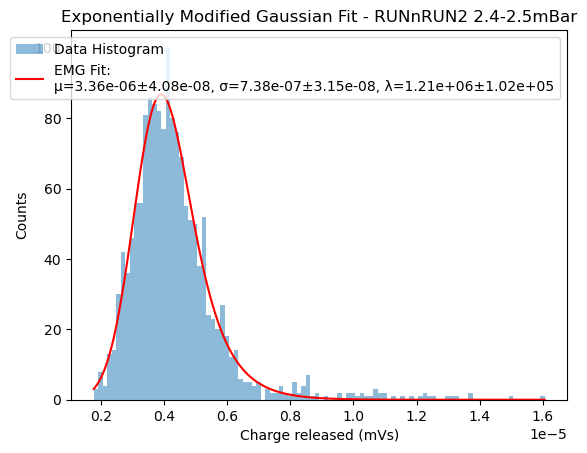

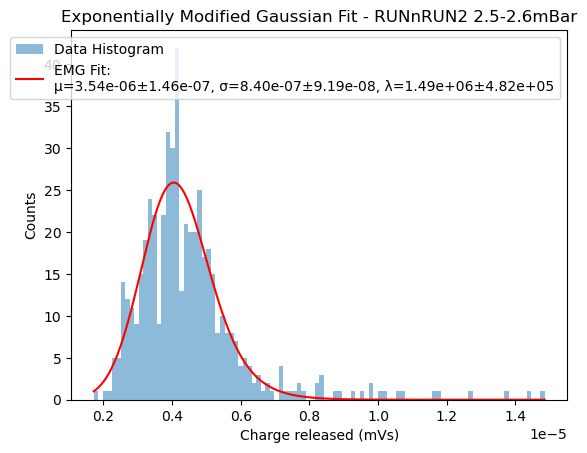

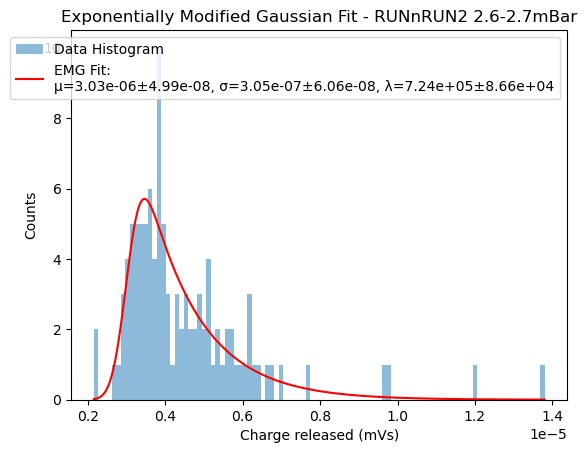

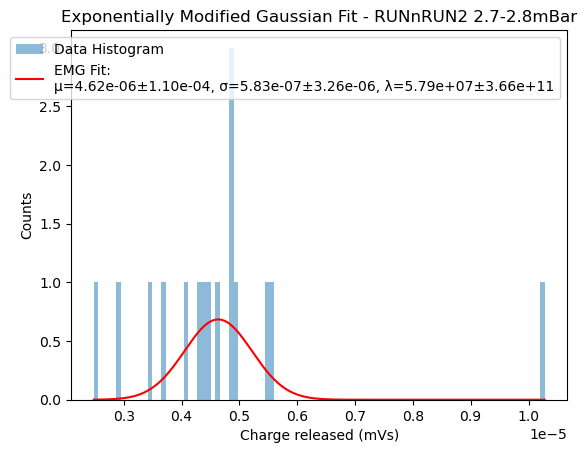

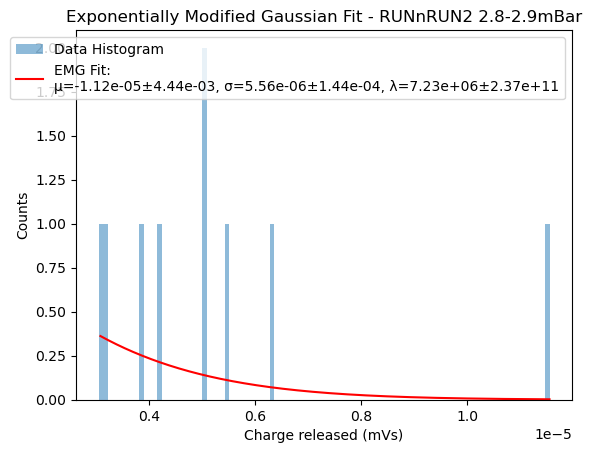

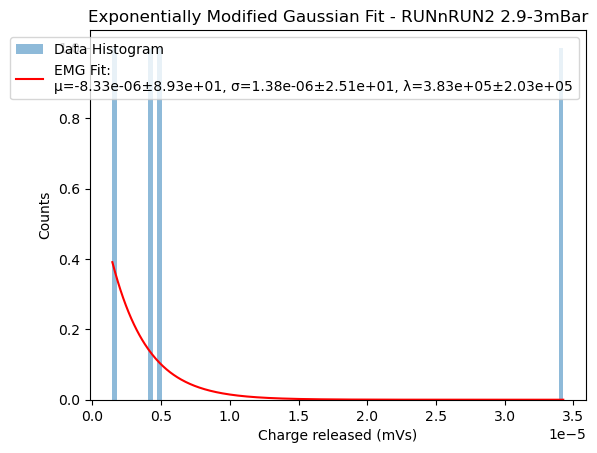

In [147]:
fitparams1 = fit_routine(areas1, nRUN1_pressure, "nRUN1", plot=False)
fitparams2 = fit_routine(areas2, nRUN2_pressure, "nRUN2", plot=True)
fitparams3 = fit_routine(areas3, nRUN3_pressure, "nRUN3", plot=False)
fitparams4 = fit_routine(areas4, nRUN4_pressure, "nRUN4", plot=False)
fitparams5 = fit_routine(areas5, nRUN5_pressure, "nRUN5", plot=False)

In [153]:
for i in range(len(fitparams1[:,0])):
    if fitparams1[i,3] > 10**-4:
        fitparams1[i,0] = np.nan

for i in range(len(fitparams2[:,0])):
    if fitparams2[i,3] > 10**-4:
        fitparams2[i,0] = np.nan

for i in range(len(fitparams3[:,0])):
    if fitparams3[i,3] > 10**-4:
        fitparams3[i,0] = np.nan

for i in range(len(fitparams4[:,0])):
    if fitparams4[i,3] > 10**-4:
        fitparams4[i,0] = np.nan

for i in range(len(fitparams5[:,0])):
    if fitparams5[i,3] > 10**-4:
        fitparams5[i,0] = np.nan

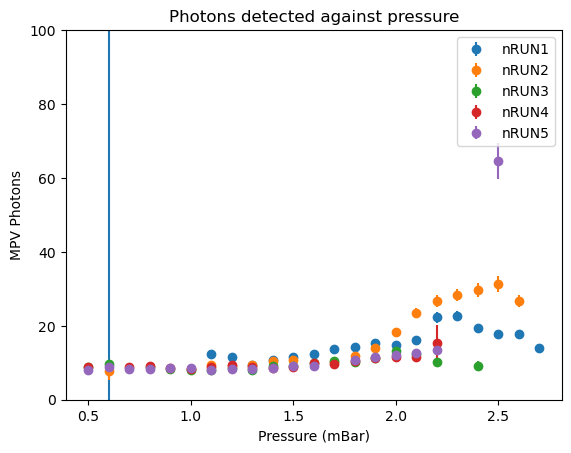

In [159]:
mpvs1 = fitparams1[:,0]
mpvs2 = fitparams2[:,0]
mpvs3 = fitparams3[:,0]
mpvs4 = fitparams4[:,0]
mpvs5 = fitparams5[:,0]

photons1 = (mpvs1 / 1e3 - 8.42e-12) / 1.13e-10
photons2 = (mpvs2 / 1e3 - 8.42e-12) / 1.13e-10
photons3 = (mpvs3 / 1e3 - 8.42e-12) / 1.13e-10
photons4 = (mpvs4 / 1e3 - 8.42e-12) / 1.13e-10
photons5 = (mpvs5 / 1e3 - 8.42e-12) / 1.13e-10

mpv_errs1 = fitparams1[:,3]
mpv_errs2 = fitparams2[:,3]
mpv_errs3 = fitparams3[:,3]
mpv_errs4 = fitparams4[:,3]
mpv_errs5 = fitparams5[:,3]

photon_errs1 = np.sqrt((mpv_errs1 / mpvs1) ** 2 + (6.71e-12 / 1.13e-10) ** 2) * np.abs(photons1) + 1.11e-11
photon_errs2 = np.sqrt((mpv_errs2 / mpvs2) ** 2 + (6.71e-12 / 1.13e-10) ** 2) * np.abs(photons2) + 1.11e-11
photon_errs3 = np.sqrt((mpv_errs3 / mpvs3) ** 2 + (6.71e-12 / 1.13e-10) ** 2) * np.abs(photons3) + 1.11e-11
photon_errs4 = np.sqrt((mpv_errs4 / mpvs4) ** 2 + (6.71e-12 / 1.13e-10) ** 2) * np.abs(photons4) + 1.11e-11
photon_errs5 = np.sqrt((mpv_errs5 / mpvs5) ** 2 + (6.71e-12 / 1.13e-10) ** 2) * np.abs(photons5) + 1.11e-11

plt.errorbar(p_windows[0:25], photons1, yerr=photon_errs1, fmt='o', label="nRUN1")
plt.errorbar(p_windows[0:25], photons2, yerr=photon_errs2, fmt='o', label="nRUN2")
plt.errorbar(p_windows[0:21], photons3, yerr=photon_errs3, fmt='o', label="nRUN3")
plt.errorbar(p_windows[0:21], photons4, yerr=photon_errs4, fmt='o', label="nRUN4")
plt.errorbar(p_windows[0:21], photons5, yerr=photon_errs5, fmt='o', label="nRUN5")

plt.xlabel("Pressure (mBar)")
plt.ylabel("MPV Photons")
plt.title("Photons detected against pressure")
plt.legend()
plt.ylim(0,100)

plt.show()